# <div class="alert alert-info"> 1 Overview - Recommendation Engines </div>

## <font color=red>1.1. Introduction</font>

Recommender System is a way of modeling and rearranging information available  about user references and then using this information to provide informed recommendations on the basic of that information. In reality, this is so useful and close to our day-to-day lives and therefore it improve company's services that utimately drive to boosting company' sales and revenue

The basis of the recommendation engine is always the recorded interaction between the users and products. For example, a movie recommendation engine will be based on the ratings provided to different movies by the users; a news artical recommender will take into account the articles the user has read in the past; etc.

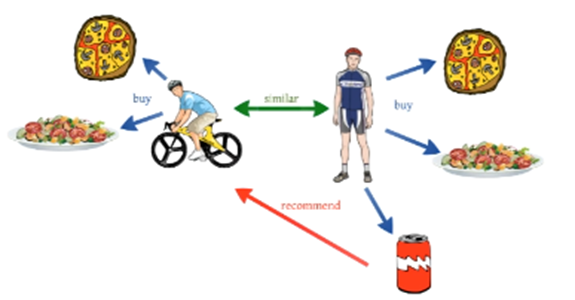

## <font color=red>1.2. Types of Recommendation and Relevant techniques</font>

The major area of distinction in different recommendation engines comes from the entity assummed is the most important in the process of generating recommendations. There are different options for choosing the central entity and that choice will determine type of recommendation engine. 

This analalysis is to consolidate and performs different approaches as the following of recommender system to movie rating data 
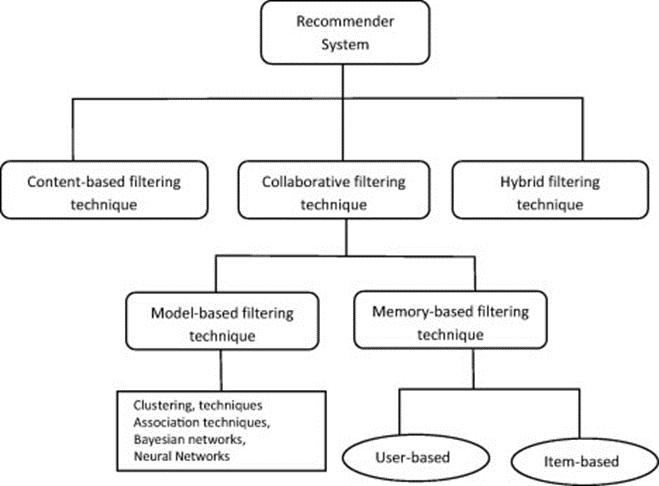

### <font color=blue>1. Popularity based recommendations</font>

The driving logic of this recommendation engine is that if some items is liked by a vast majoriy of users, then it is a good idea to recommend that item to users who have not interacted with that item.

### <font color=blue>2. Content-based/ Content Filtering recommendation engines

Content-based technique is a domain-dependent algorithm and it emphasizes more on the analysis of the attributes of items in order to generate predictions. For example, the similarity between different products is calculated on the basis of the attributes of the products. For instance, in a content-based movie recommender system, the similarity between the movies is calculated on the basis of genres, the actors in the movie, the director of the movie, etc. In content-based filtering technique, recommendation is made based on the user profiles using features extracted from the content of the items the user has evaluated in the past. The algorithms will attempt to find features about the content and find similar content. Then these similarities will be used to make recommendations to the end users.

### <font color=blue>3. Collaborative Filtering recommendation engines
    
Collaborative recommenders rely on data generated by users as they interact with items. It works by building a user-item matrix of preferences for items by users. It then matches users with relevant interest and preferences by calculating similarities between their profiles to make recommendations. Such users build a group called neighborhood. A user gets recommendations to those items that he has not rated before but that were already positively rated by users in his neighborhood. 
    
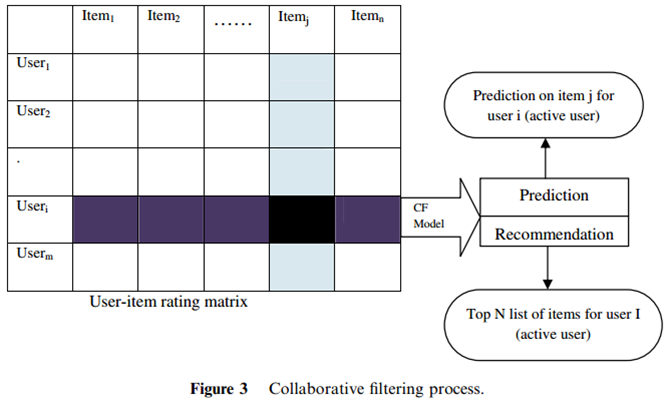
    
The technique of collaborative filtering can be divided into two categories: memory-based and model-based  
       
**Memory-based CF**: includes similarity metrics such as Cosine 
    
**Model-based CF**: In this approach, CF models are developed using machine learning algorithms to predict a user’s rating of unrated items. Some of these models/techniques include: k-nearest neighbors, clustering, matrix factorization, and deep learning models like autoencoders and using techniques like embeddings as low-dimensional hidden factors for items and users.

### <font color=blue>4. Hybrid-recommendation engines
These types of recommendation engines will take into account both rating and content features to develop recommendations. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based models because they take the similarities of content as well as users. They are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction.

This analysis employes and applies different types of recommendation engines to movie dataset

---
# <div class="alert alert-info"> 2 Import libraries and data </div>

## <font color=red>2.1.  Library</font>

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.style.use('ggplot')
# sns.set_style('dark')
%matplotlib inline

import os
import sys

import time
import datetime
from datetime import datetime
from importlib import reload
from collections import Counter
from sklearn.utils import shuffle
from sortedcontainers import SortedList

from scipy.sparse import csc_matrix
from sparsesvd import sparsesvd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from math import sqrt

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>"))

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# display various ranges 
pd.options.display.float_format = '{:.3f}'.format

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Setup complete...


## <font color=red>2.2.  Defined function</font>

In [2]:
def rmse(prediction, label):
    prediction = prediction[label.nonzero()].flatten()
    label = label[label.nonzero()].flatten()
    
    return sqrt(mean_squared_error(prediction, label))

def convert_id2dx(user_id, item_id, df_ratings):
    M = df_ratings[item_id].nunique()
    N = df_ratings[user_id].nunique()
    
    # saving original userId and movieId
    uid = df_ratings[user_id].unique()
    mid = df_ratings[item_id].unique()
    
    # create new userId and movieId
    udx = np.arange(N)
    mdx = np.arange(M)
    
    # map ids and their indices
    udx2uid = dict(zip(udx, uid))
    uid2udx = dict(zip(uid, udx))
    mdx2mid = dict(zip(mdx, mid))
    mid2mdx = dict(zip(mid, mdx))
    
    return udx2uid, uid2udx, mdx2mid, mid2mdx

## <font color=red>2.3. Data</font>

The dataset is MovieLens dataset - the most common dataset useed in building RS  

https://dl.acm.org/doi/10.1145/2827872

https://grouplens.org/datasets/movielens/

The dataset consists of just over 100,000 ratings applied to over 9,000 movies by approximately 600 users. The movies dataset consists of the ID of over 9000 the movies(movieId), the corresponding title (title) and genre of each movie(genres).

In [3]:
df_movies = pd.read_csv('data/movie_rating/movies.csv')
df_ratings = pd.read_csv('data/movie_rating/ratings.csv')
df_tags = pd.read_csv('data/movie_rating/tags.csv')
df_users = df_ratings[['userId','movieId','rating']].copy()

In [4]:
df_ratings.head()

userId  movieId  rating   timestamp
0       1       31   2.500  1260759144
1       1     1029   3.000  1260759179
2       1     1061   3.000  1260759182
3       1     1129   2.000  1260759185
4       1     1172   4.000  1260759205

In [5]:
df_tags.head()

userId  movieId                      tag   timestamp
0      15      339  sandra 'boring' bullock  1138537770
1      15     1955                  dentist  1193435061
2      15     7478                 Cambodia  1170560997
3      15    32892                  Russian  1170626366
4      15    34162              forgettable  1141391765

In [6]:
print('{} rows and {} unique movies in movies'.format(df_movies.shape[0], df_movies.movieId.nunique()))
print('{} rows and {} unique movies in ratings'.format(df_ratings.shape[0], df_ratings.movieId.nunique()))
print('{} rows and {} unique movies in tags'.format(df_tags.shape[0], df_tags.movieId.nunique()))
print('{} unique users and {} unique movies in ratings'.format(df_ratings.userId.nunique(), df_ratings.movieId.nunique()))

9125 rows and 9125 unique movies in movies
100004 rows and 9066 unique movies in ratings
1296 rows and 689 unique movies in tags
671 unique users and 9066 unique movies in ratings


---
# <div class="alert alert-info"> 3. Data Exploration </div>

## <font color=red>3.1. Investigating rating data</font>

### <font color=blue>1. Distribution of rating data

In [7]:
N = len(df_ratings.userId.unique())
M = df_movies.movieId.nunique()

print('There are {} unique users and {} unique movies in this dataset'.format(N, M))

There are 671 unique users and 9125 unique movies in this dataset


In [8]:
# rated movies
rating_count_df = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])

# unrated movies
total_count = N * M
rating_zero_count = total_count - rating_count_df['count'].sum()

# rating_count_df = rating_count_df.append(pd.DataFrame({'count':rating_zero_count}, index=[0]), verify_integrity=True).sort_index()
rating_count_df.loc[0] = rating_zero_count
rating_count_df = rating_count_df.sort_index()
rating_count_df

count
rating         
0.000   6022871
0.500      1101
1.000      3326
1.500      1687
2.000      7271
2.500      4449
3.000     20064
3.500     10538
4.000     28750
4.500      7723
5.000     15095

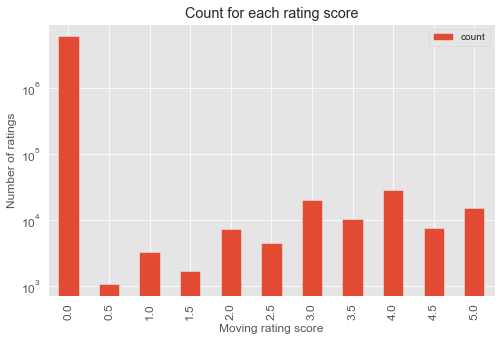

In [9]:
ax = rating_count_df.reset_index().rename(columns={'rating':  'rating score'}).plot(
    x = 'rating score',
    y = 'count',
    kind = 'bar',
    figsize = (8,5),
    title = 'Count for each rating score',
    logy = True,
    fontsize = 12)
ax.set_xlabel("Moving rating score")
ax.set_ylabel("Number of ratings")
plt.show()

By knowing the count of movies, users and movie ratings, we can better understand three things:

+ A lot of values in user-item matrix are zero. Thus, we're dealing with extremly sparse data. 
+ To get an idea about a user's taste, we need a user who's rated at least 50 out of 9000 movies
+ Similarly, to derive predictions regarding movie recommendations, we need movies that have been rated at least 50 times

### <font color=blue>2. Avg rating and popularity per movie

In [10]:
movie_summary_df = pd.DataFrame()
movie_summary_df['movie_rating'] = df_ratings.groupby(['movieId'])['rating'].mean()
movie_summary_df['movie_count'] = df_ratings.groupby(['movieId']).size()
movie_summary_df = movie_summary_df.reset_index(drop = False)
df_movies = pd.merge(df_movies, movie_summary_df, on='movieId', how='left')
df_movies.head()

movieId                               title                                       genres  movie_rating  movie_count
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         3.872      247.000
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy         3.402      107.000
2        3             Grumpier Old Men (1995)                               Comedy|Romance         3.161       59.000
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance         2.385       13.000
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000

### <font color=blue>3. top 10 popular / most rated movies

In [11]:
df_movies.sort_values('movie_count', ascending=False).head(10)

movieId                                      title                                       genres  movie_rating  movie_count
321       356                        Forrest Gump (1994)                     Comedy|Drama|Romance|War         4.054      341.000
266       296                        Pulp Fiction (1994)                  Comedy|Crime|Drama|Thriller         4.256      324.000
284       318           Shawshank Redemption, The (1994)                                  Crime|Drama         4.487      311.000
525       593           Silence of the Lambs, The (1991)                        Crime|Horror|Thriller         4.138      304.000
232       260  Star Wars: Episode IV - A New Hope (1977)                      Action|Adventure|Sci-Fi         4.222      291.000
427       480                       Jurassic Park (1993)             Action|Adventure|Sci-Fi|Thriller         3.706      274.000
2062     2571                         Matrix, The (1999)                       Action|Sci-Fi|Thriller         4.183      259.000
0           1                           Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         3.872      247.000
472       527                    Schindler's List (1993)                                    Drama|War         4.303      244.000
522       589          Terminator 2: Judgment Day (1991)                                Action|Sci-Fi         4.006      237.000

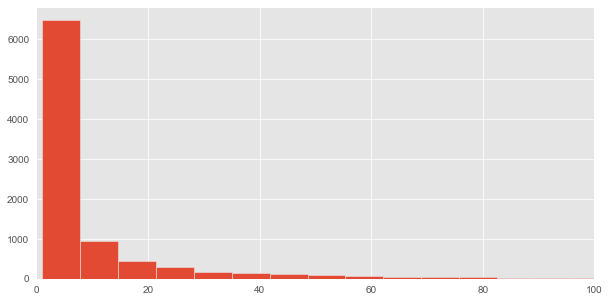

In [12]:
plt.figure(figsize=(10,5))
df_movies['movie_count'].hist(bins=50)
plt.xlim([0,100])
plt.show()

### <font color=blue>4. top 10 rating movies/ top N average rating of each movie

In [13]:
df_movies[df_movies['movie_count'] > 50].sort_values('movie_rating', ascending=False).head(10)

movieId                                title                                 genres  movie_rating  movie_count
695       858                Godfather, The (1972)                            Crime|Drama         4.487      200.000
284       318     Shawshank Redemption, The (1994)                            Crime|Drama         4.487      311.000
734       913           Maltese Falcon, The (1941)                      Film-Noir|Mystery         4.387       62.000
977      1221       Godfather: Part II, The (1974)                            Crime|Drama         4.385      135.000
48         50           Usual Suspects, The (1995)                 Crime|Mystery|Thriller         4.371      201.000
1006     1252                     Chinatown (1974)       Crime|Film-Noir|Mystery|Thriller         4.336       76.000
725       904                   Rear Window (1954)                       Mystery|Thriller         4.315       92.000
960      1203                  12 Angry Men (1957)                                  Drama         4.304       74.000
472       527              Schindler's List (1993)                              Drama|War         4.303      244.000
4432     6016  City of God (Cidade de Deus) (2002)  Action|Adventure|Crime|Drama|Thriller         4.297       69.000

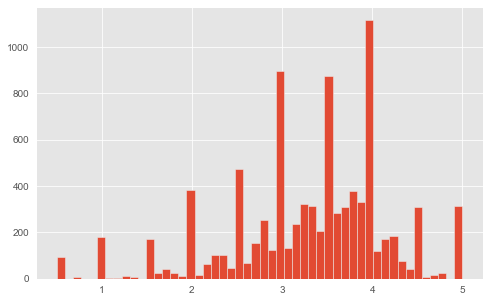

In [14]:
plt.figure(figsize=(8,5))
df_movies['movie_rating'].hist(bins=50)
plt.show()

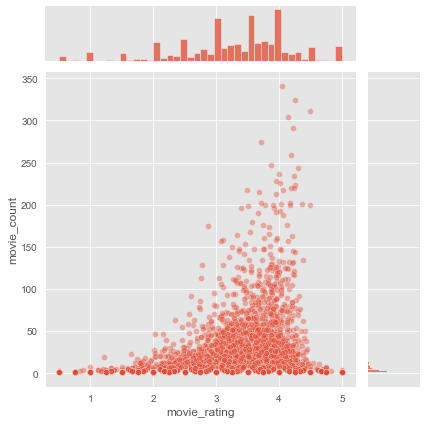

In [15]:
sns.jointplot(x='movie_rating', y='movie_count', data=df_movies, alpha=0.4)

### <font color=blue>5.  Avg rating and frequency per user

In [16]:
df_users = pd.DataFrame()
df_users['user_count'] = df_ratings.groupby(['userId'])['rating'].count()
df_users['user_rating'] = df_ratings.groupby(['userId'])['rating'].mean()
df_users = df_users.reset_index(drop=False)
df_users.sort_values(['user_count'], ascending=False).head(10)

userId  user_count  user_rating
546     547        2391        3.367
563     564        1868        3.552
623     624        1735        2.894
14       15        1700        2.622
72       73        1610        3.374
451     452        1340        3.189
467     468        1291        2.966
379     380        1063        3.366
310     311        1019        3.006
29       30        1011        3.765

## <font color=red>3.2. Filter data</font>

### <font color=blue>1. get movies rated at least 50 times

In [17]:
popularity_threshold = 50
popular_movies = list(set(df_movies.query('movie_count > @popularity_threshold').movieId))
popular_movie_df = df_movies[df_movies['movieId'].isin(popular_movies)]
print(popular_movie_df.shape)
popular_movie_df.head()

(444, 5)


movieId                               title                                       genres  movie_rating  movie_count
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         3.872      247.000
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy         3.402      107.000
2        3             Grumpier Old Men (1995)                               Comedy|Romance         3.161       59.000
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000
5        6                         Heat (1995)                        Action|Crime|Thriller         3.885      104.000

### <font color=blue>2. get users making at least 50 ratings

In [18]:
ratings_threshold = 50
# get number of ratings by user
user_count_df = pd.DataFrame(df_ratings.groupby('userId').size(), columns=['count'])
active_users = list(set(user_count_df.query('count >= @ratings_threshold').index))
print(len(active_users))

427


### <font color=blue>get corresponding ratings data of these movies and active users

In [19]:
selected_ratings_df = df_ratings[(df_ratings['movieId'].isin(popular_movies)) & (df_ratings['userId'].isin(active_users))]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and active user: ', selected_ratings_df.shape)
selected_ratings_df.head()

shape of original ratings data:  (100004, 4)
shape of ratings data after dropping both unpopular movies and active user:  (38133, 4)


userId  movieId  rating  timestamp
20       2       10   4.000  835355493
21       2       17   5.000  835355681
22       2       39   5.000  835355604
23       2       47   4.000  835355552
24       2       50   4.000  835355586

In [20]:
#selected_ratings_df.to_csv('data/movie_rating/ratings_filtered.csv', index=False)
df_ratings = pd.read_csv('data/movie_rating/ratings.csv')
print(df_ratings.shape)
df_ratings.head()

(100004, 4)


userId  movieId  rating   timestamp
0       1       31   2.500  1260759144
1       1     1029   3.000  1260759179
2       1     1061   3.000  1260759182
3       1     1129   2.000  1260759185
4       1     1172   4.000  1260759205

---
# <div class="alert alert-info"> 4. Popularity-based Recommendation </div>

## <font color=red>4.1. Introduction
    
The driving logic of this recommendation engine is that if some items is liked by a vast majority of users, then it is a good idea to recommend that item to users who have not interacted with that item</font>

## <font color=red>4.2. Get the top 10 recommendations
</font>

In [21]:
def create_popularity_recommendation(data, user_id, item_id, n_items):
    
    # Calculate count of users per movie as recommendation score
    data_grouped = data.groupby([item_id]).agg({user_id:'count'}).reset_index()
    data_grouped.rename(columns = {user_id: 'score'}, inplace=True)
    
    # Sort the movies based up recommendation score
    data_sorted = data_grouped.sort_values(['score'], ascending=0)
    
    # Generate a recommendation rank based on score
    data_sorted['Rank'] = data_sorted['score'].rank(ascending=0, method='first')
    
    # Get the top 10 recommendations
    popularity_recommendations = data_sorted.head(n_items)
    
    return popularity_recommendations

popularity_recommendations = create_popularity_recommendation(df_ratings, 'userId', 'movieId', 10)
popularity_recommendations = popularity_recommendations.merge(df_movies, how='left', on='movieId')
popularity_recommendations

movieId  score   Rank                                      title                                       genres  movie_rating  movie_count
0      356    341  1.000                        Forrest Gump (1994)                     Comedy|Drama|Romance|War         4.054      341.000
1      296    324  2.000                        Pulp Fiction (1994)                  Comedy|Crime|Drama|Thriller         4.256      324.000
2      318    311  3.000           Shawshank Redemption, The (1994)                                  Crime|Drama         4.487      311.000
3      593    304  4.000           Silence of the Lambs, The (1991)                        Crime|Horror|Thriller         4.138      304.000
4      260    291  5.000  Star Wars: Episode IV - A New Hope (1977)                      Action|Adventure|Sci-Fi         4.222      291.000
5      480    274  6.000                       Jurassic Park (1993)             Action|Adventure|Sci-Fi|Thriller         3.706      274.000
6     2571    259  7.000                         Matrix, The (1999)                       Action|Sci-Fi|Thriller         4.183      259.000
7        1    247  8.000                           Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         3.872      247.000
8      527    244  9.000                    Schindler's List (1993)                                    Drama|War         4.303      244.000
9      589    237 10.000          Terminator 2: Judgment Day (1991)                                Action|Sci-Fi         4.006      237.000

---
# <div class="alert alert-info"> 5. Content-based Recommendation </div>

## <font color=red>5.1. Introduction</font>

Content-based technique is a domain-dependent algorithm and it emphasizes more on the analysis of the attributes of items in order to generate predictions. In particular, the similarity between different products is calculated on the basis of the attributes of the products. For example, in a content-based movie recommender system, the similarity between the movies is calculated on the basis of genres, the actors in the movie, the director of the movie. etc. 

In content-base filtering technique, the calculation is made based on the content/features of the products user has used/evaluated in the past, then the algorithm will attempt to find other products that have similar content/features. These similarities will be used to make recommendations to the end users

The following steps are applied for Content-based Recommendation approach: 
1. Generate movie features, it is very important to do feature engineering that extract movie/item 's characteristics from the data as the more features that represent the particular item/movie, the more accurate the model is. For this data, there are only genre information which is too general, not specific enough to provide more detail/specific info that represent the characterstics of each movie. The following step tries to extract more info like 'tag' in ratings data to use as features for movie. However, the problem is most of the movie there are no tag at all or the tag is too short or meaningless that is able to use </br>


2. Apply Cosine formula to each pair of movies' attributes. Hence for each of movie, it provides the top N movies that are most similar (have highest Cosine scores) </br>


3. Based on customer's profile of items/movies that customers have used in the past, it recommends the top N similar items/movies

## <font color=red>5.2. Generat Features</font>

### <font color=blue>1. Generate genres
Firstly, generate set of genre features from genres column, if a movie has one of these genres, then the corresponding feature has value of 1, otherwise 0. 

In [22]:
df_movies.head()

movieId                               title                                       genres  movie_rating  movie_count
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy         3.872      247.000
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy         3.402      107.000
2        3             Grumpier Old Men (1995)                               Comedy|Romance         3.161       59.000
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance         2.385       13.000
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

df_movies['genres'] = df_movies['genres'].str.replace(pat="|", repl=" ")
df_movies['genres'] = df_movies['genres'].str.replace(pat="-", repl="")
bow = CountVectorizer(ngram_range=(0,1), stop_words='english')
bow.fit(df_movies['genres'])

genre_df = bow.transform(df_movies['genres'])
genre_df = pd.DataFrame(genre_df.toarray())
genre_df.columns = bow.get_feature_names()
genre_df.head()

action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller  war  western
0       0          1          1         1       1      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
1       0          1          0         1       0      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
2       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        1      0         0    0        0
3       0          0          0         0       1      0            0      1        0         0       0       0     0       0        0        0        1      0         0    0        0
4       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        0      0         0    0        0

In [24]:
print(sorted(bow.vocabulary_.keys()))
print(bow.get_feature_names())
columns = bow.get_feature_names()
freq_genre = genre_df.sum(axis=0).sort_values(ascending=False)
freq_genre

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']
['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']


drama          4365
comedy         3315
thriller       1729
action         1545
romance        1545
adventure      1117
crime          1100
horror          877
scifi           792
fantasy         654
children        583
mystery         543
documentary     495
animation       447
musical         394
war             367
western         168
imax            153
filmnoir        133
listed           18
genres           18
dtype: int64

In [25]:
genre_df['movieId'] = df_movies['movieId']
movie_profile = pd.merge(df_movies[['movieId','title','movie_rating','movie_count']], genre_df, how='left', on='movieId')
print(movie_profile.shape)
movie_profile.head()

(9125, 25)


movieId                               title  movie_rating  movie_count  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller  war  western
0        1                    Toy Story (1995)         3.872      247.000       0          1          1         1       1      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
1        2                      Jumanji (1995)         3.402      107.000       0          1          0         1       0      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
2        3             Grumpier Old Men (1995)         3.161       59.000       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        1      0         0    0        0
3        4            Waiting to Exhale (1995)         2.385       13.000       0          0          0         0       1      0            0      1        0         0       0       0     0       0        0        0        1      0         0    0        0
4        5  Father of the Bride Part II (1995)         3.268       56.000       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        0      0         0    0        0

### <font color=blue>2. Combine tag to movie to get more info
for each movie, tag from users's comments are combined together in order to add more feature extraction

In [26]:
df_tags = pd.read_csv('data/movie_rating/tags.csv')
print(df_tags.shape)
print(df_tags.movieId.nunique())
df_tags[df_tags['movieId'] == 47]

(1296, 4)
689


userId  movieId            tag   timestamp
339     364       47       biblical  1444534976
340     364       47          crime  1444534982
341     364       47           dark  1444534994
342     364       47     disturbing  1444534971
343     364       47          greed  1444534998
344     364       47         horror  1444534981
345     364       47  serial killer  1444534961
346     364       47        violent  1444534985
727     501       47     psychology  1292956276
728     501       47   twist ending  1292956362

In [27]:
df_tags_movie = pd.DataFrame(df_tags.groupby("movieId")['tag'].apply(lambda x: "{%s}" % ' '.join(x)))
#df_tags_movie.columns = ['movieId', 'tag']
df_tags_movie.head()

tag
movieId                                                   
1                                                  {Pixar}
5                                           {steve martin}
47       {biblical crime dark disturbing greed horror s...
50                                              {thriller}
104                                         {adam sandler}

In [28]:
df_movies = pd.merge(df_movies, df_tags_movie, left_on='movieId', right_index=True, how='left')
df_movies.head()

movieId                               title                                       genres  movie_rating  movie_count             tag
0        1                    Toy Story (1995)  Adventure Animation Children Comedy Fantasy         3.872      247.000         {Pixar}
1        2                      Jumanji (1995)                   Adventure Children Fantasy         3.402      107.000             NaN
2        3             Grumpier Old Men (1995)                               Comedy Romance         3.161       59.000             NaN
3        4            Waiting to Exhale (1995)                         Comedy Drama Romance         2.385       13.000             NaN
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000  {steve martin}

In [29]:
df_movies['tag'].fillna("", inplace=True)
df_movies.head()

movieId                               title                                       genres  movie_rating  movie_count             tag
0        1                    Toy Story (1995)  Adventure Animation Children Comedy Fantasy         3.872      247.000         {Pixar}
1        2                      Jumanji (1995)                   Adventure Children Fantasy         3.402      107.000                
2        3             Grumpier Old Men (1995)                               Comedy Romance         3.161       59.000                
3        4            Waiting to Exhale (1995)                         Comedy Drama Romance         2.385       13.000                
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000  {steve martin}

### <font color=blue> 3. combine genres and  tags data to movie

In [30]:
df_movies['document'] = df_movies[['genres','tag']].apply(lambda x: ' '.join(x), axis=1)
df_movies.head()

movieId                               title                                       genres  movie_rating  movie_count             tag                                           document
0        1                    Toy Story (1995)  Adventure Animation Children Comedy Fantasy         3.872      247.000         {Pixar}  Adventure Animation Children Comedy Fantasy {P...
1        2                      Jumanji (1995)                   Adventure Children Fantasy         3.402      107.000                                        Adventure Children Fantasy 
2        3             Grumpier Old Men (1995)                               Comedy Romance         3.161       59.000                                                    Comedy Romance 
3        4            Waiting to Exhale (1995)                         Comedy Drama Romance         2.385       13.000                                              Comedy Drama Romance 
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000  {steve martin}                              Comedy {steve martin}

### <font color=blue> 4. Normalize text data

As a word may have variant form but has the same meansing such read, reading,...  Therefore, it is necessary to normalize/starndardize text data such as remove special characters, stemming and lemmatize to convert the word into root word

In [31]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
from nltk.tokenize.toktok import ToktokTokenizer
import re

def normalize_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None):
    
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # Removing Special Characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # non_ascii
    # text = "".join(i for i in s if ord(i)<128)
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")
df_movies['text_clean'] = df_movies['document'].apply(lambda x: normalize_text(x, flg_stemm=True, flg_lemm=True, lst_stopwords=lst_stopwords))
print(df_movies.shape)
df_movies.head()

(9125, 8)


movieId                               title                                       genres  movie_rating  movie_count             tag                                           document                                text_clean
0        1                    Toy Story (1995)  Adventure Animation Children Comedy Fantasy         3.872      247.000         {Pixar}  Adventure Animation Children Comedy Fantasy {P...  adventur anim child comedi fantasi pixar
1        2                      Jumanji (1995)                   Adventure Children Fantasy         3.402      107.000                                        Adventure Children Fantasy                     adventur child fantasi
2        3             Grumpier Old Men (1995)                               Comedy Romance         3.161       59.000                                                    Comedy Romance                              comedi romanc
3        4            Waiting to Exhale (1995)                         Comedy Drama Romance         2.385       13.000                                              Comedy Drama Romance                        comedi drama romanc
4        5  Father of the Bride Part II (1995)                                       Comedy         3.268       56.000  {steve martin}                              Comedy {steve martin}                       comedi steve martin

### <font color=blue> 5. Feature Extractiong - Convert text to numeric data for model training

The Tf*Idf algorithm is used to weight a keyword in any document and assign the importance to that keyword based on the number of times it appears in the document. Put simply, the higher the Tf*Idf score (weight), the rarer and more important the term, and vice versa

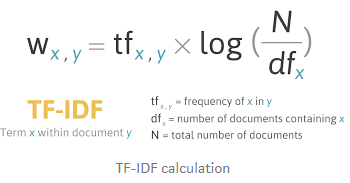

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(0,1), min_df=0.0002, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['text_clean'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df_movies.index.tolist())
print(tfidf_df.shape)

(9125, 222)


In [33]:
path = "data/movie_rating/"
with open(f'{path}tfidf_matrix.pkl','rb') as f:
    tfidf_df = pickle.load(f)
    
print(tfidf_df.shape)
tfidf_df.head()

(9125, 222)


0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81   \
0 0.000 0.000 0.000 0.272 0.000 0.000 0.000 0.000 0.000 0.000 0.353 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.329 0.000 0.000 0.000 0.000 0.177 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.319 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1 0.000 0.000 0.000 0.511 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.617 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.599 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
2 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.587 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
3 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.523 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.452 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
4 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.167 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   

    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163  \
0 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.748 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1 0.000 0.000 0.000 0.000 0

In [34]:
# feature list
print(tfidf.get_feature_names())

['action', 'adam', 'adapt', 'adventur', 'afi', 'age', 'alex', 'alien', 'altern', 'ang', 'anim', 'appeal', 'art', 'assassin', 'atmospher', 'bad', 'base', 'beauti', 'billi', 'bkk', 'black', 'bob', 'book', 'bore', 'brad', 'breathtak', 'british', 'brother', 'bullock', 'charact', 'child', 'christoph', 'cinematographi', 'classic', 'come', 'comedi', 'comic', 'cool', 'creativ', 'crime', 'critic', 'crude', 'cult', 'danc', 'dark', 'del', 'depp', 'discoveri', 'disney', 'disturb', 'documentari', 'drama', 'dvd', 'dystopia', 'ei', 'emot', 'end', 'explos', 'fairi', 'famili', 'fantasi', 'fashion', 'feel', 'feelgood', 'fienn', 'film', 'filmnoir', 'food', 'friendship', 'frontal', 'fu', 'funni', 'game', 'geniu', 'genr', 'georg', 'getdvd', 'ghibli', 'gibson', 'gilliam', 'girli', 'good', 'great', 'guy', 'gwenth', 'hank', 'happi', 'hdtv', 'histor', 'hole', 'honest', 'horror', 'hugh', 'humor', 'ii', 'imagin', 'imax', 'indi', 'intellectu', 'intellig', 'jack', 'jackman', 'jesu', 'john', 'johnni', 'katso', 'kei

In [35]:
df_movies.to_csv('data/movie_rating/movie_profife.csv', index=False)

### <font color=blue> 6. Dimensinality Reduction

In total, there are 222 features but data is very sparse (most of cells are 0). This data often exhibits noise that's hard for the model to learn and detect correct pattern. Hence, the following step appliesAuto Encoder Decoder DNN to reduce the dimensionality of data from 222 to 25

#### Deep Learning libraries

In [36]:
import tensorflow as tf
import keras
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import datetime

#### Model architecture

In [37]:
tf.random.set_seed(42)
np.random.seed(42)
keras.backend.clear_session()

# No of neurons in each layer
input_dim = tfidf_df.shape[1]
encoding_dim = input_dim/2
latent_dim = 25

input_layer = Input(shape=(input_dim, ))
encoder = Dense(int(encoding_dim), activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(latent_dim), activation='relu')(encoder)
decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(int(input_dim), activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 222)]             0         
                                                                 
 dense (Dense)               (None, 111)               24753     
                                                                 
 dense_1 (Dense)             (None, 25)                2800      
                                                                 
 dense_2 (Dense)             (None, 111)               2886      
                                                                 
 dense_3 (Dense)             (None, 222)               24864     
                                                                 
Total params: 55,303
Trainable params: 55,303
Non-trainable params: 0
_________________________________________________________________


In [38]:
# this model maps an input to its encoded representation
encoder_layer = Model(input_layer, encoder)
# create a placeholder for an encoded input
encoded_input = Input(shape=(int(latent_dim),))
# retrieve the last layer of autoencoder model
decoder_layer = autoencoder.layers[-2]
# create the decoder model
decoder_layer = Model(encoded_input, decoder_layer(encoded_input))

decoder_layer

#### Training AutoEncoderDecoder

In [39]:
nb_epoch = 100
batch_size = 1000
autoencoder.compile(optimizer='adam', loss='mse')

cp = ModelCheckpoint(filepath='autoencoder1.h5', save_best_only=True, verbose=0)
tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
t_ini = datetime.datetime.now()
history = autoencoder.fit(tfidf_df, 
                          tfidf_df, 
                          epochs=nb_epoch, 
                          batch_size=batch_size, 
                          shuffle=True, 
                          validation_split=0.1, 
                          verbose=1).history
t_fin = datetime.datetime.now()
print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))

df_history = pd.DataFrame(history)

Epoch 1/100
9/9 [==============================] - 1s 38ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/100
9/9 [=========

Epoch 79/100
9/9 [==============================] - 0s 9ms/step - loss: 2.4396e-04 - val_loss: 5.1060e-04
Epoch 80/100
9/9 [==============================] - 0s 9ms/step - loss: 2.4314e-04 - val_loss: 5.0985e-04
Epoch 81/100
9/9 [==============================] - 0s 8ms/step - loss: 2.4244e-04 - val_loss: 5.0950e-04
Epoch 82/100
9/9 [==============================] - 0s 8ms/step - loss: 2.4174e-04 - val_loss: 5.0890e-04
Epoch 83/100
9/9 [==============================] - 0s 8ms/step - loss: 2.4103e-04 - val_loss: 5.0836e-04
Epoch 84/100
9/9 [==============================] - 0s 8ms/step - loss: 2.4039e-04 - val_loss: 5.0811e-04
Epoch 85/100
9/9 [==============================] - 0s 9ms/step - loss: 2.3983e-04 - val_loss: 5.0767e-04
Epoch 86/100
9/9 [==============================] - 0s 9ms/step - loss: 2.3920e-04 - val_loss: 5.0748e-04
Epoch 87/100
9/9 [==============================] - 0s 8ms/step - loss: 2.3859e-04 - val_loss: 5.0672e-04
Epoch 88/100
9/9 [============================

#### Visualize Training

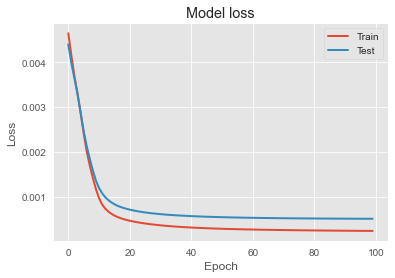

In [40]:
plt.plot(df_history['loss'], linewidth=2, label='Train')
plt.plot(df_history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [41]:
encoded = encoder_layer.predict(tfidf_df)
len(encoded[0])

25

In [42]:
decoded = decoder_layer.predict(encoded)
len(decoded[0])

111

In [43]:
with open('data/movie_rating/movie_tfidf_embeddings.pkl', 'wb') as fh:
    pickle.dump(encoded, fh)

## <font color=red>5.3. Calculate content embedding Similarity</font>

In [44]:
path = "data/movie_rating/"
content_embeddings = pd.read_pickle(os.path.join(f'{path}movie_tfidf_embeddings.pkl'))
content_embeddings = pd.DataFrame(content_embeddings)
print(content_embeddings.shape)
content_embeddings.head()

(9125, 25)


0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24
0 0.189 0.101 0.091 0.168 0.089 0.156 0.124 0.041 0.104 0.106 0.055 0.057 0.119 0.225 0.046 0.141 0.015 0.099 0.068 0.133 0.097 0.161 0.096 0.166 0.144
1 0.215 0.025 0.136 0.198 0.072 0.184 0.213 0.005 0.086 0.143 0.043 0.067 0.081 0.180 0.026 0.216 0.050 0.109 0.114 0.099 0.052 0.178 0.150 0.211 0.168
2 0.187 0.124 0.190 0.143 0.117 0.097 0.064 0.146 0.064 0.102 0.072 0.026 0.195 0.104 0.080 0.141 0.065 0.145 0.138 0.057 0.160 0.153 0.114 0.058 0.183
3 0.156 0.110 0.151 0.145 0.128 0.113 0.046 0.161 0.056 0.129 0.101 0.019 0.161 0.093 0.114 0.141 0.054 0.153 0.141 0.070 0.151 0.181 0.073 0.090 0.178
4 0.116 0.134 0.128 0.146 0.091 0.158 0.105 0.088 0.092 0.108 0.075 0.077 0.140 0.110 0.116 0.108 0.046 0.111 0.117 0.105 0.097 0.117 0.113 0.101 0.100

### <font color=blue> 1. Cosine Similarity
    
Cosine formula is to mesuare angles between the vectors are calculated to determine the similarity between the vectors. Cosine will increase as the angle between vectors decrease, which signifies more similarity    

In [45]:
from sklearn.metrics.pairwise import  cosine_similarity

similarity_matrix = pd.DataFrame(cosine_similarity(content_embeddings), index=content_embeddings.index.tolist())
similarity_matrix.head(3)

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    \
0 1.000 0.956 0.887 0.890 0.939 0.842 0.887 0.940 0.843 0.876 0.890 0.830 0.960 0.875 0.875 0.843 0.876 0.909 0.909 0.850 0.857 0.811 0.842 0.836 0.876 0.875 0.919 0.876 0.878 0.843 0.875 0.826 0.919 0.876 0.843 0.872 0.938 0.887 0.875 0.835 0.836 0.875 0.915 0.862 0.876 0.879 0.910 0.876 0.840 0.890 0.908 0.938 0.875 0.875 0.890 0.832 0.956 0.848 0.875 0.862 0.887 0.909 0.842 0.887 0.909 0.825 0.843 0.894 0.835 0.876 0.842 0.803 0.846 0.848 0.919 0.848 0.894 0.876 0.894 0.876 0.886 0.938   
1 0.956 1.000 0.842 0.840 0.896 0.823 0.842 0.958 0.818 0.865 0.840 0.751 0.900 0.827 0.843 0.811 0.835 0.849 0.849 0.822 0.827 0.757 0.823 0.796 0.835 0.827 0.922 0.835 0.879 0.811 0.827 0.789 0.922 0.835 0.811 0.828 0.926 0.842 0.827 0.795 0.811 0.827 0.938 0.830 0.835 0.818 0.835 0.835 0.818 0.840 0.882 0.926 0.827 0.827 0.840 0.795 1.000 0.830 0.827 0.814 0.842 0.849 0.812 0.842 0.849 0.774 0.818 0.833 0.795 0.835 0.812 0.763 0.828 0.830 0.922 0.812 0.833 0.835 0.833 0.835 0.862 0.926   
2 0.887 0.842 1.000 0.985 0.944 0.853 1.000 0.842 0.843 0.839 0.985 0.870 0.820 0.865 0.913 0.838 0.968 0.940 0.940 0.866 0.893 0.840 0.853 0.821 0.968 0.865 0.849 0.968 0.821 0.838 0.865 0.841 0.849 0.968 0.838 0.866 0.894 1.000 0.865 0.808 0.832 0.865 0.857 0.900 0.968 0.843 0.876 0.968 0.860 0.985 0.851 0.894 0.865 0.865 0.985 0.842 0.842 0.864 0.865 0.881 1.000 0.940 0.831 1.000 0.940 0.872 0.843 0.914 0.808 0.968 0.831 0.798 0.844 0.864 0.849 0.919 0.914 0.968 0.914 0.968 0.830 0.894   

   82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163   \
0 0.909 0.843 0.828 0.838 0.890 0.876 0.894 0.843 0.843 0.803 0.848 0.870 0.909 0.826 0.934 0.876 0.909 0.803 0.840 0.896 0.878 0.832 0.875 0.803 0.843 0.887 0.909 0.875 0.887 0.826 0.875 0.909 0.956 0.887 0.875 0.876 0.851 0.909 0.803 0.876 0.909 0.909 0.850 0.940 0.875 0.875 0.843 0.949 0.826 0.811 0.914 0.875 0.875 0.894 0.847 0.940 0.833 0.860 0.831 0.803 0.778 0.827 0.842 0.860 0.875 0.836 0.935 0.861 0.894 0.842 0.829 0.909 0.875 0.909 0.808 0.894 0.876 0.887 0.899 0.839 0.875 0.842   
1 0.849 0.825 0.777 0.767 0.840 0.865 0.833 0.811 0.825 0.763 0.830 0.840 0.849 0.789 0.895 0.835 0.902 0.763 0.806 0.861 0.849 0.795 0.827 0.763 0.811 0.842 0.849 0.827 0.842 0.786 0.827 0.849 1.000 0.842 0.827 0.835 0.832 0.849 0.763 0.835 0.849 0.849 0.822 0.958 0.827 0.827 0.825 0.912 0.778 0.741 0.881 0.827 0.848 0.833 0.798 0.958 0.794 0.841 0.811 0.763 0.720 0.812 0.823 0.809 0.827 0.795 0.945 0.853 0.833 0.812 0.803 0.849 0.827 0.849 0.736 0.833 0.835 0.842 0.901 0.783 0.827 0.823   
2 0.940 0.848 0.850 0.938 0.985 0.839 0.914 0.838 0.848 0.798 0.864 0.916 0.940 0.841 0.936 0.968 0.834 0.798 0.810 0.913 0.868 0.842 0.865 0.798 0.838 1.000 0.940 0.865 1.000 0.912 0.865 0.940 0.842 1.000 0.865 0.968 0.869 0.940 0.798 0.968 0.940 0.940 0.866 0.842 0.865 0.865 0.852 0.927 0.862 0.839 0.925 0.865 0.824 0.914 0.838 0.842 0.834 0.822 0.808 0.798 0.860 0.824 0.853 0.881 0.865 0.917 0.842 0.845 0.914 0.831 0.835 0.940 0.865 0.940 0.825 0.914 0.968 1.000 0.828 0.881 0.865 0.853   

   164   165   166   167 

In [46]:
with open('data/movie_rating/content_based_cosine.pkl', 'wb') as fh:
    pickle.dump(similarity_matrix, fh)

In [47]:
def content_cosine_rec(similarity_matrix, df_movies, MovieID):
    MovieIndex = df_movies[df_movies.movieId == MovieID].index.values[0]
    #print('Movie Name: ' +  df_movies.loc[df_movies.movieId == MovieID].title + ', ' + df_movies.loc[df_movies.movieId == MovieID,'text_clean'])
    result_df = df_movies.copy()
    result_df['score'] = similarity_matrix.iloc[MovieIndex]
    result_df = result_df[['movieId','score','title','genres','tag','document','text_clean']]
    result_df.sort_values(['score','title'], ascending=False, inplace=True)
    return result_df.head(11)    

In [48]:
# MovieID = 40815
# MovieID = 318
MovieID = 7153
content_cosine_rec(similarity_matrix, df_movies, MovieID)

movieId  score                                              title                               genres                                       tag                                           document                                         text_clean
5026     7153  1.000  Lord of the Rings: The Return of the King, The...       Action Adventure Drama Fantasy                             {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
4395     5952  0.992      Lord of the Rings: The Two Towers, The (2002)                    Adventure Fantasy                             {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
3871     4993  0.991  Lord of the Rings: The Fellowship of the Ring,...                    Adventure Fantasy                                    {long}                           Adventure Fantasy {long}                              adventur fantasi long
3819     4911  0.989                                 Jabberwocky (1977)             Adventure Comedy Fantasy                                 {Gilliam}                 Adventure Comedy Fantasy {Gilliam}                    adventur comedi fantasi gilliam
5134     7373  0.988                                     Hellboy (2004)      Action Adventure Fantasy Horror  {Guillermo del Toro steampunk superhero}  Action Adventure Fantasy Horror {Guillermo del...  action adventur fantasi horror guillermo del t...
7790    86332  0.988                                        Thor (2011)  Action Adventure Drama Fantasy IMAX                                                         Action Adventure Drama Fantasy IMAX                  action adventur drama fantasi imax
6735    54001  0.988   Harry Potter and the Order of the Phoenix (2007)         Adventure Drama Fantasy IMAX                                                                Adventure Drama Fantasy IMAX                         adventur drama fantasi imax
3524     4467  0.987         Adventures of Baron Munchausen, The (1988)             Adventure Comedy Fantasy              {Trilogy of the Imagination}  Adventure Comedy Fantasy {Trilogy of the Imagi...              adventur comedi fantasi trilog imagin
8029    93766  0.984                         Wrath of the Titans (2012)        Action Adventure Fantasy IMAX                                                               Action Adventure Fantasy IMAX                        action adventur fantasi imax
8439   106072  0.984                        Thor: The Dark World (2013)        Action Adventure Fantasy IMAX                                                               Action Adventure Fantasy IMAX                        action adventur fantasi imax
7807    86880  0.984  Pirates of the Caribbean: On Stranger Tides (2...        Action Adventure Fantasy IMAX                                                               Action Adventure Fantasy IMAX                        action adventur fantasi imax

### <font color=blue> 2. Euclidean Distance Similarity

In [49]:
from sklearn.metrics.pairwise import euclidean_distances

similarity_matrix = pd.DataFrame(euclidean_distances(content_embeddings), index=content_embeddings.index.tolist())
similarity_matrix.head(3)

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    \
0 0.000 0.209 0.295 0.290 0.210 0.351 0.295 0.245 0.349 0.319 0.290 0.374 0.185 0.297 0.315 0.345 0.304 0.258 0.258 0.349 0.344 0.411 0.351 0.363 0.304 0.297 0.288 0.304 0.337 0.345 0.297 0.414 0.288 0.304 0.345 0.308 0.247 0.295 0.297 0.368 0.361 0.297 0.263 0.344 0.304 0.341 0.303 0.304 0.394 0.290 0.263 0.247 0.297 0.297 0.290 0.386 0.209 0.352 0.297 0.326 0.295 0.258 0.355 0.295 0.258 0.377 0.349 0.276 0.368 0.304 0.355 0.403 0.350 0.352 0.288 0.347 0.276 0.304 0.276 0.304 0.296 0.247   
1 0.209 0.000 0.376 0.377 0.314 0.398 0.376 0.203 0.403 0.352 0.377 0.478 0.302 0.388 0.376 0.408 0.381 0.366 0.366 0.403 0.399 0.484 0.398 0.429 0.381 0.388 0.280 0.381 0.343 0.408 0.388 0.465 0.280 0.381 0.408 0.389 0.266 0.376 0.388 0.433 0.413 0.388 0.239 0.399 0.381 0.424 0.408 0.381 0.429 0.377 0.325 0.266 0.388 0.388 0.377 0.443 0.000 0.395 0.388 0.406 0.376 0.366 0.412 0.376 0.366 0.454 0.403 0.382 0.433 0.381 0.412 0.466 0.394 0.395 0.280 0.411 0.382 0.381 0.382 0.381 0.351 0.266   
2 0.295 0.376 0.000 0.108 0.213 0.343 0.000 0.382 0.355 0.367 0.108 0.330 0.386 0.316 0.266 0.356 0.158 0.215 0.215 0.333 0.301 0.382 0.343 0.384 0.158 0.316 0.381 0.158 0.405 0.356 0.316 0.398 0.381 0.158 0.356 0.321 0.313 0.000 0.316 0.401 0.370 0.316 0.343 0.296 0.158 0.385 0.349 0.158 0.371 0.108 0.340 0.313 0.316 0.316 0.108 0.377 0.376 0.337 0.316 0.307 0.000 0.215 0.371 0.000 0.215 0.327 0.355 0.257 0.401 0.158 0.371 0.412 0.356 0.337 0.381 0.256 0.257 0.158 0.257 0.158 0.367 0.313   

   82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163   \
0 0.258 0.347 0.378 0.384 0.290 0.319 0.276 0.345 0.347 0.403 0.352 0.338 0.258 0.414 0.220 0.304 0.302 0.403 0.362 0.276 0.311 0.386 0.297 0.403 0.345 0.295 0.258 0.297 0.295 0.378 0.297 0.258 0.209 0.295 0.297 0.304 0.369 0.258 0.403 0.304 0.258 0.258 0.349 0.245 0.297 0.297 0.358 0.193 0.385 0.391 0.252 0.297 0.328 0.276 0.361 0.245 0.377 0.353 0.388 0.403 0.431 0.459 0.351 0.323 0.297 0.360 0.246 0.343 0.276 0.355 0.383 0.258 0.297 0.258 0.402 0.276 0.304 0.295 0.325 0.376 0.297 0.351   
1 0.366 0.394 0.453 0.475 0.377 0.352 0.382 0.408 0.394 0.466 0.395 0.389 0.366 0.465 0.318 0.381 0.313 0.466 0.421 0.351 0.369 0.443 0.388 0.466 0.408 0.376 0.366 0.388 0.376 0.443 0.388 0.366 0.000 0.376 0.388 0.381 0.404 0.366 0.466 0.381 0.366 0.366 0.403 0.203 0.388 0.388 0.400 0.287 0.456 0.485 0.327 0.388 0.377 0.382 0.434 0.203 0.439 0.389 0.427 0.466 0.510 0.473 0.398 0.410 0.388 0.429 0.229 0.369 0.382 0.412 0.431 0.366 0.388 0.366 0.495 0.382 0.381 0.376 0.319 0.455 0.388 0.398   
2 0.215 0.346 0.356 0.245 0.108 0.367 0.257 0.356 0.346 0.412 0.337 0.275 0.215 0.398 0.228 0.158 0.397 0.412 0.398 0.257 0.326 0.377 0.316 0.412 0.356 0.000 0.215 0.316 0.000 0.273 0.316 0.215 0.376 0.000 0.316 0.158 0.348 0.215 0.412 0.158 0.215 0.215 0.333 0.382 0.316 0.316 0.351 0.236 0.347 0.365 0.241 0.316 0.391 0.257 0.374 0.382 0.379 0.399 0.416 0.412 0.347 0.460 0.343 0.304 0.316 0.259 0.374 0.364 0.257 0.371 0.379 0.215 0.316 0.215 0.387 0.257 0.158 0.000 0.412 0.327 0.316 0.343   

   164   165   166   167 

In [50]:
with open('data/movie_rating/content_based_euclidean.pkl', 'wb') as fh:
    pickle.dump(similarity_matrix, fh)

In [51]:
def content_euclidean_rec(similarity_matrix, df_movies, MovieID):
    MovieIndex = df_movies[df_movies.movieId == MovieID].index.values[0]
    #print('Movie Name: ' +  df_movies.loc[df_movies.movieId == MovieID].title + ', ' + df_movies.loc[df_movies.movieId == MovieID,'text_clean'])
    result_df = df_movies.copy()
    result_df['score'] = similarity_matrix.iloc[MovieIndex]
    result_df = result_df[['movieId','score','title','genres','tag','document','text_clean']]
    result_df.sort_values(['score','title'], ascending=True, inplace=True)
    return result_df.head(11) 

In [52]:
# MovieID = 40815
# MovieID = 318
MovieID = 7153
content_euclidean_rec(similarity_matrix, df_movies, MovieID)

movieId  score                                              title                               genres                                                tag                                           document                                         text_clean
5026     7153  0.000  Lord of the Rings: The Return of the King, The...       Action Adventure Drama Fantasy                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
4395     5952  0.075      Lord of the Rings: The Two Towers, The (2002)                    Adventure Fantasy                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
3871     4993  0.087  Lord of the Rings: The Fellowship of the Ring,...                    Adventure Fantasy                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
5134     7373  0.090                                     Hellboy (2004)      Action Adventure Fantasy Horror           {Guillermo del Toro steampunk superhero}  Action Adventure Fantasy Horror {Guillermo del...  action adventur fantasi horror guillermo del t...
3819     4911  0.091                                 Jabberwocky (1977)             Adventure Comedy Fantasy                                          {Gilliam}                 Adventure Comedy Fantasy {Gilliam}                    adventur comedi fantasi gilliam
6735    54001  0.093   Harry Potter and the Order of the Phoenix (2007)         Adventure Drama Fantasy IMAX                                                                         Adventure Drama Fantasy IMAX                         adventur drama fantasi imax
3524     4467  0.093         Adventures of Baron Munchausen, The (1988)             Adventure Comedy Fantasy                       {Trilogy of the Imagination}  Adventure Comedy Fantasy {Trilogy of the Imagi...              adventur comedi fantasi trilog imagin
7790    86332  0.097                                        Thor (2011)  Action Adventure Drama Fantasy IMAX                                                                  Action Adventure Drama Fantasy IMAX                  action adventur drama fantasi imax
4693     6539  0.104  Pirates of the Caribbean: The Curse of the Bla...      Action Adventure Comedy Fantasy  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
1581     2019  0.107        Seven Samurai (Shichinin no samurai) (1954)               Action Adventure Drama                                     {long classic}              Action Adventure Drama {long classic}                 action adventur drama long classic
7670    81834  0.112  Harry Potter and the Deathly Hallows: Part 1 (...        Action Adventure Fantasy IMAX                                                                        Action Adventure Fantasy IMAX                        action adventur fantasi imax

## <font color=red>5.4. Prediction using KNN</font>

### <font color=blue> 1. Data Preparation

In [53]:
df_ratings = pd.read_csv('data/movie_rating/ratings_filtered.csv')
df_ratings = df_ratings.reset_index(drop=True)
udx2uid, uid2udx, mdx2mid, mid2mdx = convert_id2dx('userId', 'movieId', df_ratings)

# apply index to dataframe
df_ratings['user_index'] = df_ratings.apply(lambda x:uid2udx[x['userId']], axis=1)
df_ratings['movie_index'] = df_ratings.apply(lambda x:mid2mdx[x['movieId']], axis=1)

df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
df_movies['movie_index'] = df_movies.apply(lambda x:mid2mdx[x['movieId']], axis=1)

N = df_ratings.user_index.nunique()
M = df_ratings.movie_index.nunique()
N, M

(427, 444)

In [54]:
MovieID = 7153
MovieIndex = mid2mdx[MovieID]
print(MovieID, MovieIndex)

df_movies.loc[df_movies.movieId == MovieID,]

7153 72


movieId                                              title                          genres  movie_rating  movie_count            tag                                      document                               text_clean  movie_index
5026     7153  Lord of the Rings: The Return of the King, The...  Action Adventure Drama Fantasy         4.128      176.000  {boring long}  Action Adventure Drama Fantasy {boring long}  action adventur drama fantasi bore long           72

In [55]:
path = "data/movie_rating/"

content_embeddings = pd.read_pickle(os.path.join(f'{path}movie_tfidf_embeddings.pkl'))
content_embeddings = pd.DataFrame(content_embeddings)
print(content_embeddings.shape)
content_embeddings.head()

(9125, 25)


0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24
0 0.189 0.101 0.091 0.168 0.089 0.156 0.124 0.041 0.104 0.106 0.055 0.057 0.119 0.225 0.046 0.141 0.015 0.099 0.068 0.133 0.097 0.161 0.096 0.166 0.144
1 0.215 0.025 0.136 0.198 0.072 0.184 0.213 0.005 0.086 0.143 0.043 0.067 0.081 0.180 0.026 0.216 0.050 0.109 0.114 0.099 0.052 0.178 0.150 0.211 0.168
2 0.187 0.124 0.190 0.143 0.117 0.097 0.064 0.146 0.064 0.102 0.072 0.026 0.195 0.104 0.080 0.141 0.065 0.145 0.138 0.057 0.160 0.153 0.114 0.058 0.183
3 0.156 0.110 0.151 0.145 0.128 0.113 0.046 0.161 0.056 0.129 0.101 0.019 0.161 0.093 0.114 0.141 0.054 0.153 0.141 0.070 0.151 0.181 0.073 0.090 0.178
4 0.116 0.134 0.128 0.146 0.091 0.158 0.105 0.088 0.092 0.108 0.075 0.077 0.140 0.110 0.116 0.108 0.046 0.111 0.117 0.105 0.097 0.117 0.113 0.101 0.100

In [56]:
content_embeddings_cols = content_embeddings.columns
content_embeddings['movieId'] = df_movies['movieId']
content_embeddings = content_embeddings[content_embeddings.movieId.isin(mid2mdx.keys())]
content_embeddings['movie_index'] = content_embeddings.apply(lambda x:mid2mdx[x['movieId']], axis=1)
content_embeddings = content_embeddings.sort_values(['movie_index'])

print(content_embeddings.shape)
content_embeddings[content_embeddings.movieId == MovieID]

(444, 27)


0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24  movieId  movie_index
5026 0.184 0.080 0.115 0.139 0.092 0.165 0.081 0.064 0.119 0.125 0.074 0.087 0.078 0.155 0.083 0.121 0.055 0.109 0.128 0.074 0.061 0.130 0.175 0.148 0.102 7153.000           72

### <font color=blue> 2. Recommendations

In [57]:
def get_detailed_recs(movie_index, embeddings, df_movies):
    #get similar movies
    similarity_matrix = cosine_similarity(embeddings)
    item_sim_df = pd.DataFrame(similarity_matrix[movie_index])
    item_sim_df =  item_sim_df.reset_index(drop=False)
    item_sim_df.columns = ['movie_index', 'similarity_score']
    # assign movie_index
    item_sim_df['movie_index'] = sorted(mdx2mid.keys())
    # merge with table item_data to get the description info
    item_sim_df = item_sim_df.merge(df_movies, left_on='movie_index', right_on = 'movie_index', how='left')
    # sort similarity score in descending order
    item_sim_df = item_sim_df.sort_values('similarity_score', ascending=False)
    item_sim_df.reset_index(drop=True, inplace=True)  

    return item_sim_df

In [58]:
CT_sim_df = get_detailed_recs(MovieIndex, content_embeddings[content_embeddings_cols], df_movies)
CT_sim_df.head(10)

movie_index  similarity_score  movieId                                              title                           genres  movie_rating  movie_count                                                tag                                           document                                         text_clean
0           72             1.000     7153  Lord of the Rings: The Return of the King, The...   Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
1          249             0.992     5952      Lord of the Rings: The Two Towers, The (2002)                Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
2          246             0.991     4993  Lord of the Rings: The Fellowship of the Ring,...                Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
3          401             0.984     6539  Pirates of the Caribbean: The Curse of the Bla...  Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
4          346             0.983     2019        Seven Samurai (Shichinin no samurai) (1954)           Action Adventure Drama         4.278       54.000                                     {long classic}              Action Adventure Drama {long classic}                 action adventur drama long classic
5          406             0.982     8368    Harry Potter and the Prisoner of Azkaban (2004)           Adventure Fantasy IMAX         3.762       84.000                                                                               Adventure Fantasy IMAX                               adventur fantasi imax
6          119             0.980     1265                               Groundhog Day (1993)           Comedy Fantasy Romance         3.839      165.000  {alternate reality Bill Murray character devel...  Comedy Fantasy Romance {alternate reality Bill...  comedi fantasi romanc altern realiti bill murr...
7            8             0.977      150                                   Apollo 13 (1995)             Adventure Drama IMAX         3.902      200.000                             {Ron Howard tom hanks}        Adventure Drama IMAX {Ron Howard tom hanks}            adventur drama imax ron howard tom hank
8          335             0.976     1610                   Hunt for Red October, The (1990)        Action Adventure Thriller         3.897       97.000                                     {Katso Sanna!}           Action Adventure Thriller {Katso Sanna!}               action adventur thriller katso sanna
9           74             0.975     8636                                Spider-Man 2 (2004)      Action Adventure SciFi IMAX         3.625       84.000                       {the best comic adaptation!}  Action Adventure SciFi IMAX {the best comic ad...        action adventur scifi imax best comic adapt

### <font color=blue> 3. Train model

#### Split data

The training matrix contains 80% of the ratings and the testing matrix contains 20% of the ratings. 
Since we have split the data into testing and training we will need to create two matrices (all users by all movies). 

In [59]:
df_ratings.head()

userId  movieId  rating  timestamp  user_index  movie_index
0       2       10   4.000  835355493           0            0
1       2       17   5.000  835355681           0            1
2       2       39   5.000  835355604           0            2
3       2       47   4.000  835355552           0            3
4       2       50   4.000  835355586           0            4

In [60]:
train_data, test_data = train_test_split(df_ratings[['user_index', 'movie_index','rating']], test_size=0.2)

# create user-item matrices for training and testing
train_data_matrix = np.zeros((N, M))
for line in train_data.itertuples():
    train_data_matrix[line[1], line[2]] = line[3]

test_data_matrix = np.zeros((N, M))
for line in test_data.itertuples():
    test_data_matrix[line[1], line[2]] =  line[3]
    
train_data_matrix.shape, test_data_matrix.shape

((427, 444), (427, 444))

In [61]:
from sklearn.neighbors import NearestNeighbors

k = 20
item_pred_k = np.zeros(train_data_matrix.T.shape)
knn_item = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)
knn_item.fit(content_embeddings[content_embeddings_cols])
# user item matrix is train_data_matrix, item user matrix is train_data_matrix.T
top_k_distances, top_k_movies = knn_item.kneighbors(content_embeddings[content_embeddings_cols], return_distance=True)
top_k_distances = np.round(1 - top_k_distances,3)

In [62]:
top_k_distances

array([[1.   , 1.   , 1.   , ..., 0.957, 0.957, 0.956],
       [1.   , 1.   , 1.   , ..., 0.982, 0.982, 0.982],
       [1.   , 1.   , 1.   , ..., 0.985, 0.985, 0.985],
       ...,
       [1.   , 1.   , 0.988, ..., 0.898, 0.897, 0.896],
       [1.   , 1.   , 1.   , ..., 0.954, 0.95 , 0.948],
       [1.   , 0.991, 0.991, ..., 0.961, 0.961, 0.961]], dtype=float32)

In [63]:
top_k_movies.shape

(444, 20)

In [64]:
from sklearn.neighbors import NearestNeighbors

k = 20
item_pred_k = np.zeros(train_data_matrix.T.shape)
knn_item = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)
knn_item.fit(content_embeddings[content_embeddings_cols])
# user item matrix is train_data_matrix, item user matrix is train_data_matrix.T
top_k_distances, top_k_movies = knn_item.kneighbors(content_embeddings[content_embeddings_cols], return_distance=True)
top_k_distances = np.round(1 - top_k_distances,3)

for i in range(train_data_matrix.T.shape[0]):
    item_pred_k[i,:] = top_k_distances[i].dot(train_data_matrix.T[top_k_movies][i])/np.array([np.abs(top_k_distances[i]).sum(axis=0)]).T

###  <font color=blue>4. Performance Evaluation

In [65]:
from sklearn.metrics import mean_squared_error
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    '''
    print('prediction:')
    print(pred[0:10])
    print('actual:')
    print(actual[0:10])
    '''
    return sqrt(mean_squared_error(pred, actual))

In [66]:
   
print('Train set')
print(rmse(item_pred_k, train_data_matrix.T))
print('\n\nTest set')
print(rmse(item_pred_k, test_data_matrix.T))

Train set
2.7567212145885365


Test set
2.9441636061772773


## <font color=red> 5.5. Analyzing the Results and Conclusion

#### Advantages
+ User independence: Collaborative filtering needs other users’ ratings to find similarities between the users and then give suggestions. Instead, the content-based method only has to analyze the items and a single user’s profile for the recommendation, which makes the process less cumbersome. Content-based filtering would thus produce more reliable results with fewer users in the system.
+ Transparency: Collaborative filtering gives recommendations based on other unknown users who have the same taste as a given user, but with content-based filtering items are recommended on a feature-level basis.
+ No cold start: As opposed to collaborative filtering, new items can be suggested before being rated by a substantial number of users.

#### Disadvantages
+ Limited content analysis: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation itself risks being imprecise.
+ Over-specialization: Content-based filtering provides a limited degree of novelty, since it has to match up the features of a user’s profile with available items. In the case of item-based filtering, only item profiles are created and users are suggested items similar to what they rate or search for, instead of their past history. A perfect content-based filtering system may suggest nothing unexpected or surprising.

#### Conclusion
We have learned to make a fully-functional recommender system in Python with content-based filtering. But as we saw above, content-based filtering is not practical, or rather, not very dependable when the number of items increases along with a need for clear and differentiated descriptions

To overcome all the issues discussed earlier, we can implement collaborative filtering techniques, which have proven to be better and more scalable. We’ll work on their implementations in the upcoming parts of the series.

---

# <div class="alert alert-info"> 6. Collaborative Filtering recommendation engines </div>

## <font color=red>6.1. Introduction</font> 
    
Collaborative recommenders rely on data generated by users as they interact with items. It works by building a user-item matrix of preferences for items by users. It then matches users with relevant interest and preferences by calculating similarities between their profiles to make recommendations. Such users build a group called neighborhood. A user gets recommendations to those items that he has not rated before but that were already positively rated by users in his neighborhood. 
    
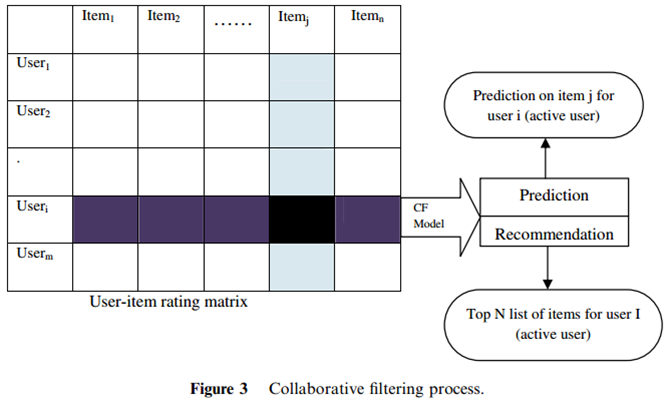
    
The technique of collaborative filtering can be divided into two categories: memory-based and model-based  
       
**Memory-based CF**: includes similarity metrics such as Cosine 
    
**Model-based CF**: In this approach, CF models are developed using machine learning algorithms to predict a user’s rating of unrated items. Some of these models/techniques include: k-nearest neighbors, clustering, matrix factorization, and deep learning models like autoencoders and using techniques like embeddings as low-dimensional hidden factors for items and users.

## <font color=red>6.2. Data Preparation</font> 

###  <font color=blue> 1. Import data

In [67]:
df_ratings = pd.read_csv('data/movie_rating/ratings_filtered.csv')
udx2uid, uid2udx, mdx2mid, mid2mdx = convert_id2dx('userId', 'movieId', df_ratings)

# apply index to dataframe
df_ratings['user_index'] = df_ratings.apply(lambda x:uid2udx[x['userId']], axis=1)
df_ratings['movie_index'] = df_ratings.apply(lambda x:mid2mdx[x['movieId']], axis=1)

df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
df_movies['movie_index'] = df_movies.apply(lambda x:mid2mdx[x['movieId']], axis=1)

N = df_ratings.user_index.nunique()
M = df_ratings.movie_index.nunique()
N, M

(427, 444)

###  <font color=blue> 2. Calculate User Item Matrix and Item User Matrix

#### User Item matrix

In [68]:
user_item_mt = df_ratings.pivot_table(index='user_index', columns='movie_index', values='rating')
user_item_mt.fillna(0, inplace=True)
user_item_mt.head(2)

movie_index   0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80   \
user_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
0           4.000 5.000 5.000 4.000 4.000 3.000 3.000 4.000 5.000 4.000 3.000 3.000 3.000 3.000 1.000 3.000 3.000 4.000 4.000 5.000 5.000 3.000 4.000 3.000 2.000 3.000 4.000 4.000 3.000 3.000 3.000 3.000 2.000 3.000 3.000 4.000 3.000 2.000 4.000 3.000 3.000 4.000 4.000 4.000 4.000 3.000 5.000 3.000 3.000 3.000 5.000 5.000 5.000 3.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1           0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.500 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 2.500 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 3.000 3.000 0.000 5.000 2.000 3.500 4.000 5.000 3.000 3.500 4.500 4.000 3.000 3.500 4.000 5.000 5.000 3.000 3.500 3.000 2.500 3.000 3.000 3.500 3.000 0.000 0.000 0.000 0.000   

movie_index   81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161  \
user_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
0           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
1           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

#### Item User matrix

In [69]:
#item_user_mt = user_item_mt.T

item_user_mt = df_ratings.pivot_table(index='movie_index', columns='user_index', values='rating')
item_user_mt.fillna(0, inplace=True)
item_user_mt.head(2)

user_index    0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80   \
movie_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0           4.000 0.000 4.000 0.000 3.000 0.000 0.000 0.000 3.000 0.000 0.000 3.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 3.000 5.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 2.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.500 4.000 3.500 0.000 0.000 0.000 0.000 3.000 0.000 0.000 3.000   
1           5.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000   

user_index    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161  \
movie_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0           0.000 3.500 0.000 0.000 4.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 5.000 1.500 0.000 0.000 3.500 2.500 0.000 4.000 0.000 4.000 2.500 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 2.500 0.000 0.000 0.000 3.500 0.000 3.500 0.000 3.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000 3.500 0.000 0.000 4.000 0.000 0.000 0.000 4.000   
1           0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 4.000 3.500 0.000 0.000 0.000 0.000 0.000 0.000 5.000 0.000 5.000 0.000 0.000 5.000 0.000 0.000 0.000 0.000 0.000 4.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 

###  <font color=blue>3. Split data

The training matrix contains 80% of the ratings and the testing matrix contains 20% of the ratings. 
Since we have split the data into testing and training we will need to create two matrices (all users by all movies). 

In [70]:
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

train_data, test_data = train_test_split(df_ratings[['user_index', 'movie_index', 'rating']], test_size=0.2)

# Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((N, M))
for line in train_data.itertuples():
    train_data_matrix[line[1], line[2]] = line[3]
    
test_data_matrix = np.zeros((N, M))
for line in test_data.itertuples():
    test_data_matrix[line[1], line[2]] = line[3]
    
train_data_matrix.shape, test_data_matrix.shape

((427, 444), (427, 444))

##  <font color=red>6.3. Memory-based CF: Item-Item CF</font>

###  <font color=blue>1. Calculate user similarity and item similarity using cosine

In [71]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = 1 - pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric='cosine')

user_similarity.shape, item_similarity.shape

((427, 427), (444, 444))

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(train_data_matrix)
item_similarity = cosine_similarity(train_data_matrix.T)

pd.DataFrame(user_similarity).head(3)

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81   \
0 1.000 0.211 0.150 0.128 0.212 0.153 0.000 0.120 0.204 0.123 0.099 0.324 0.231 0.141 0.153 0.194 0.155 0.000 0.226 0.075 0.012 0.152 0.357 0.190 0.368 0.129 0.193 0.247 0.123 0.096 0.035 0.138 0.150 0.081 0.141 0.025 0.111 0.000 0.102 0.340 0.184 0.154 0.086 0.139 0.265 0.151 0.221 0.197 0.106 0.000 0.114 0.084 0.552 0.509 0.243 0.117 0.027 0.113 0.505 0.205 0.165 0.113 0.034 0.128 0.122 0.227 0.083 0.166 0.074 0.144 0.295 0.566 0.317 0.046 0.134 0.219 0.229 0.518 0.156 0.127 0.431 0.172   
1 0.211 1.000 0.117 0.111 0.205 0.331 0.096 0.152 0.204 0.230 0.022 0.183 0.264 0.112 0.280 0.190 0.283 0.031 0.199 0.241 0.155 0.170 0.238 0.345 0.168 0.196 0.346 0.202 0.319 0.203 0.061 0.204 0.067 0.000 0.184 0.032 0.149 0.111 0.193 0.214 0.255 0.251 0.030 0.278 0.291 0.195 0.283 0.235 0.261 0.126 0.165 0.251 0.202 0.181 0.261 0.136 0.118 0.230 0.212 0.109 0.330 0.132 0.061 0.290 0.264 0.305 0.156 0.155 0.193 0.146 0.215 0.170 0.307 0.152 0.114 0.200 0.305 0.293 0.254 0.306 0.160 0.215   
2 0.150 0.117 1.000 0.162 0.311 0.257 0.089 0.139 0.335 0.243 0.050 0.405 0.115 0.318 0.201 0.259 0.076 0.129 0.440 0.093 0.103 0.328 0.142 0.136 0.110 0.264 0.184 0.177 0.103 0.150 0.059 0.298 0.411 0.155 0.136 0.104 0.197 0.127 0.154 0.146 0.225 0.162 0.044 0.185 0.345 0.236 0.371 0.247 0.139 0.137 0.202 0.114 0.184 0.141 0.325 0.124 0.094 0.154 0.167 0.202 0.117 0.128 0.031 0.155 0.067 0.139 0.215 0.406 0.098 0.090 0.324 0.152 0.300 0.049 0.267 0.321 0.288 0.176 0.213 0.259 0.198 0.119   

    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163  \
0 0.242 0.141 0.086 0.174 0.070 0.233 0.049 0.052 0.069 0.128 0.210 0.088 0.123 0.211 0.512 0.197 0.000 0.136 0.135 0.270 0.141 0.550 0.253 0.096 0.272 0.098 0.380 0.000 0.104 0.079 0.279 0.063 0.507 0.126 0.152 0.611 0.019 0.008 0.370 0.097 0.431 0.144 0.040 0.074 0.000 0.174 0.147 0.241 0.000 0.115 0.156 0.273 0.243 0.181 0.086 0.057 0.086 0.178 0.222 0.000 0.341 0.084 0.024 0.276 0.084 0.206 0.157 0.052 0.137 0.211 0.406 0.182 0.240 0.125 0.170 0.276 0.058 0.037 0.068 0.211 0.373 0.016   
1 0.264 0.126 0.152 0.242 0.112 0.145 0.144 0.148 0.057 0.355 0.362 0.074 0.133 0.258 0.171 0.265 0.140 0.215 0.236 0.294 0.254 0.136 0.394 0.218 0.302 0.094 0.183 0.159 0.162 0.191 0.159 0.305 0.112 0.292 0.219 0.255 0.131 0.120 0.130 0.171 0.183 0.108 0.066 0.107 0.072 0.274 0.224 0.313 0.131 0.204 0.181 0.287 0.220 0.255 0.045 0.283 0.129 0.148 0.212 0.000 0.131 0.156 0.230 0.218 0.185 0.232 0.134 0.259 0.139 0.283 0.221 0.156 0.311 0.223 0.185 0.257 0.152 0.166 0.167 0.259 0.103 0.123   
2 0.419 0.078 0.183 0.391 0.136 0.384 0.089 0.230 0.180 0.096 0.204 0.208 0.115 0.279 0.200 0.222 0.128 0.187 0.194 0.249 0.195 0.144 0.078 0.221 0.265 0.099 0.226 0.016 0.183 0.152 0.295 0.271 0.129 0.265 0.214 0.219 0.165 0.072 0.108 0.239 0.113 0.301 0.030 0.308 0.083 0.158 0.141 0.219 0.088 0.130 0.095 0.319 0.226 0.372 0.126 0.174 0.261 0.270 0.253 0.069 0.122 0.231 0.095 0.432 0.173 0.150 0.263 0.024 0.290 0.191 0.129 0.354 0.300 0.283 0.136 0.363 0.150 0.059 0.169 0.260 0.153 0.085   

    164   165   166   167 

In [73]:
pd.DataFrame(item_similarity).head(3)

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81   \
0 1.000 0.140 0.277 0.408 0.321 0.124 0.247 0.458 0.401 0.460 0.376 0.545 0.492 0.453 0.344 0.332 0.248 0.436 0.143 0.156 0.235 0.485 0.455 0.248 0.387 0.362 0.577 0.375 0.393 0.325 0.457 0.390 0.349 0.485 0.384 0.433 0.453 0.397 0.473 0.339 0.198 0.450 0.358 0.210 0.338 0.394 0.266 0.372 0.379 0.399 0.462 0.449 0.501 0.390 0.173 0.343 0.329 0.385 0.218 0.246 0.295 0.292 0.234 0.286 0.300 0.259 0.239 0.280 0.111 0.245 0.167 0.227 0.231 0.156 0.199 0.188 0.100 0.316 0.285 0.289 0.338 0.441   
1 0.140 1.000 0.296 0.225 0.222 0.333 0.351 0.259 0.311 0.217 0.188 0.173 0.167 0.183 0.197 0.217 0.241 0.188 0.333 0.428 0.302 0.241 0.276 0.350 0.265 0.395 0.241 0.296 0.278 0.410 0.280 0.203 0.182 0.309 0.168 0.240 0.297 0.193 0.269 0.120 0.297 0.335 0.324 0.384 0.253 0.329 0.204 0.296 0.322 0.273 0.257 0.314 0.274 0.315 0.352 0.283 0.305 0.283 0.212 0.255 0.225 0.208 0.274 0.204 0.211 0.247 0.214 0.134 0.091 0.077 0.132 0.174 0.118 0.133 0.150 0.072 0.014 0.363 0.231 0.118 0.279 0.176   
2 0.277 0.296 1.000 0.306 0.357 0.176 0.195 0.300 0.345 0.307 0.240 0.333 0.353 0.254 0.314 0.250 0.236 0.342 0.239 0.246 0.265 0.331 0.337 0.216 0.279 0.402 0.308 0.344 0.411 0.419 0.363 0.337 0.314 0.415 0.293 0.325 0.368 0.279 0.363 0.206 0.222 0.442 0.359 0.248 0.320 0.388 0.283 0.327 0.338 0.441 0.333 0.328 0.355 0.336 0.105 0.316 0.392 0.290 0.278 0.325 0.247 0.273 0.351 0.217 0.279 0.247 0.229 0.197 0.080 0.147 0.132 0.214 0.157 0.119 0.159 0.147 0.121 0.344 0.287 0.063 0.257 0.233   

    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    100   101   102   103   104   105   106   107   108   109   110   111   112   113   114   115   116   117   118   119   120   121   122   123   124   125   126   127   128   129   130   131   132   133   134   135   136   137   138   139   140   141   142   143   144   145   146   147   148   149   150   151   152   153   154   155   156   157   158   159   160   161   162   163  \
0 0.504 0.465 0.359 0.368 0.406 0.239 0.259 0.214 0.194 0.100 0.080 0.073 0.245 0.161 0.215 0.321 0.251 0.187 0.250 0.232 0.252 0.247 0.299 0.284 0.334 0.241 0.250 0.216 0.286 0.155 0.141 0.206 0.111 0.108 0.376 0.252 0.207 0.270 0.246 0.165 0.176 0.153 0.177 0.342 0.149 0.260 0.260 0.214 0.248 0.165 0.268 0.233 0.322 0.124 0.326 0.228 0.240 0.256 0.325 0.357 0.308 0.154 0.213 0.239 0.161 0.352 0.288 0.250 0.168 0.207 0.324 0.280 0.300 0.257 0.113 0.206 0.264 0.203 0.351 0.263 0.289 0.187   
1 0.225 0.202 0.168 0.330 0.108 0.225 0.262 0.207 0.260 0.194 0.253 0.223 0.287 0.309 0.271 0.241 0.352 0.327 0.231 0.269 0.209 0.174 0.294 0.265 0.248 0.140 0.204 0.220 0.210 0.217 0.195 0.238 0.272 0.306 0.199 0.209 0.295 0.247 0.201 0.382 0.331 0.160 0.273 0.254 0.303 0.229 0.265 0.121 0.171 0.285 0.292 0.190 0.137 0.306 0.103 0.277 0.226 0.187 0.199 0.197 0.248 0.321 0.275 0.273 0.125 0.159 0.244 0.298 0.216 0.314 0.166 0.202 0.149 0.159 0.180 0.182 0.277 0.195 0.133 0.250 0.204 0.187   
2 0.301 0.237 0.220 0.376 0.190 0.231 0.233 0.202 0.180 0.152 0.164 0.192 0.304 0.213 0.201 0.233 0.286 0.285 0.232 0.295 0.194 0.235 0.234 0.243 0.170 0.174 0.206 0.203 0.213 0.131 0.227 0.222 0.210 0.236 0.263 0.154 0.270 0.307 0.241 0.235 0.217 0.238 0.288 0.243 0.289 0.130 0.122 0.116 0.153 0.285 0.290 0.226 0.148 0.229 0.163 0.257 0.183 0.285 0.190 0.147 0.186 0.232 0.312 0.261 0.235 0.192 0.215 0.172 0.161 0.293 0.195 0.132 0.251 0.212 0.267 0.257 0.318 0.265 0.207 0.313 0.199 0.306   

    164   165   166   167 

###  <font color=blue>2. Prediction using all data

Next step is to make predictions. You have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF and item-based CF

In [74]:
item_pred = item_similarity.dot(train_data_matrix.T)/np.array([np.abs(item_similarity).sum(axis=1)]).T
print(item_pred.shape)

(444, 427)


###  <font color=blue>3.  Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

You can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE. To read more about different evaluation metrics you can take a look at [this article](http://research.microsoft.com/pubs/115396/EvaluationMetrics.TR.pdf). 

Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [75]:
item_pred = item_similarity.dot(train_data_matrix.T)/np.array([np.abs(item_similarity).sum(axis=1)]).T
print('Train set')
print(rmse(item_pred, train_data_matrix.T))

print('\n\nTest set')
print(rmse(item_pred, test_data_matrix.T))

Train set
2.8711882010771


Test set
2.9280823581832225


###  <font color=blue>4. Prediction using k neigbors

The k-nearest neighbors (KNN) algorithm doesn’t make any assumptions on the underlying data distribution, but it relies on item feature similarity. When a KNN makes a prediction about a movie, it will calculate the “distance” (distance metrics will be discussed later) between the target movie and every other movie in its database. It then ranks its distances and returns the top k nearest neighbor movies as the most similar movie recommendations.

In [76]:
train_data_matrix.T

array([[4., 0., 4., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 2., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
from sklearn.neighbors import NearestNeighbors

k = 18
item_pred_k = np.zeros(train_data_matrix.T.shape)
knn_item = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)
knn_item.fit(train_data_matrix.T)
# user item matrix is train_data_matrix, item user matrix is train_data_matrix.T
top_k_distances, top_k_movies = knn_item.kneighbors(train_data_matrix.T, return_distance=True)
top_k_distances = np.round(1 - top_k_distances,3)

for i in range(train_data_matrix.T.shape[0]):
    item_pred_k[i,:] = top_k_distances[i].dot(train_data_matrix.T[top_k_movies][i])/np.array([np.abs(top_k_distances[i]).sum(axis=0)]).T
    
print('Train set')
print(rmse(item_pred_k, train_data_matrix.T))
print('\n\nTest set')
print(rmse(item_pred_k, test_data_matrix.T))

Train set
1.9084239942635828


Test set
2.5290382235746787


###  <font color=blue>5. Recommendation

In [78]:
#MovieID = 318
MovieID = 7153
MovieIndex = mid2mdx[MovieID]
print(MovieID, MovieIndex)

7153 72


#### Find similar movies

In [79]:
print("Most similar movies of movie: ", df_movies[df_movies.movieId == MovieID].title.iloc[0])

item_sim_df = pd.DataFrame(item_similarity[MovieIndex])
item_sim_df =  item_sim_df.reset_index(drop=False)
item_sim_df.columns = ['movie_index', 'similarity_score']
# merge with table item_data to get the description info
item_sim_df = item_sim_df.merge(df_movies, on='movie_index', how='left')
# sort similarity score in descending order
item_sim_df = item_sim_df.sort_values('similarity_score', ascending=False)
item_sim_df.reset_index(drop=True, inplace=True)
item_sim_df.loc[1:6]
item_sim_df.head(6)

Most similar movies of movie:  Lord of the Rings: The Return of the King, The (2003)


movie_index  similarity_score  movieId                                              title                                      genres  movie_rating  movie_count                                                tag                                           document                                         text_clean
0           72             1.000     7153  Lord of the Rings: The Return of the King, The...              Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
1          249             0.722     5952      Lord of the Rings: The Two Towers, The (2002)                           Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
2          246             0.717     4993  Lord of the Rings: The Fellowship of the Ring,...                           Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
3          401             0.639     6539  Pirates of the Caribbean: The Curse of the Bla...             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
4          408             0.593     8961                            Incredibles, The (2004)  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}  Action Adventure Animation Children Comedy {su...        action adventur anim child comedi superhero
5           69             0.572     5349                                  Spider-Man (2002)             Action Adventure SciFi Thriller         3.522      134.000                                    {tobey maguire}    Action Adventure SciFi Thriller {tobey maguire}        action adventur scifi thriller tobey maguir

In [80]:
print("Most similar movies of movie: ", df_movies[df_movies.movieId == MovieID].title.iloc[0])

item_sim_df = pd.DataFrame(item_similarity[MovieIndex])
item_sim_df =  item_sim_df.reset_index(drop=False)
item_sim_df.columns = ['movie_index', 'similarity_score']
# merge with table item_data to get the description info
item_sim_df = item_sim_df.merge(df_movies, on='movie_index', how='left')
# sort similarity score in descending order
item_sim_df = item_sim_df.sort_values('similarity_score', ascending=False)
item_sim_df.reset_index(drop=True, inplace=True)
item_sim_df.loc[1:6]
item_sim_df.head(6)

Most similar movies of movie:  Lord of the Rings: The Return of the King, The (2003)


movie_index  similarity_score  movieId                                              title                                      genres  movie_rating  movie_count                                                tag                                           document                                         text_clean
0           72             1.000     7153  Lord of the Rings: The Return of the King, The...              Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
1          249             0.722     5952      Lord of the Rings: The Two Towers, The (2002)                           Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
2          246             0.717     4993  Lord of the Rings: The Fellowship of the Ring,...                           Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
3          401             0.639     6539  Pirates of the Caribbean: The Curse of the Bla...             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
4          408             0.593     8961                            Incredibles, The (2004)  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}  Action Adventure Animation Children Comedy {su...        action adventur anim child comedi superhero
5           69             0.572     5349                                  Spider-Man (2002)             Action Adventure SciFi Thriller         3.522      134.000                                    {tobey maguire}    Action Adventure SciFi Thriller {tobey maguire}        action adventur scifi thriller tobey maguir

In [81]:
def item(item_id):
    return df_movies.loc[df_movies['movieId'] == item_id].title.values[0]

def cf_item_recommendation(item_similarity, item_id, num, ascending_type):
    print("Recommending " + str(num) + " movies similar to " + item(item_id) + "...")
    print("----------")
    result_df = df_movies.copy()
    result_df = result_df[result_df.movieId.isin(mid2mdx.keys())].reset_index(drop=True) 
    result_df['movie_index'] = result_df.apply(lambda x:mid2mdx[x['movieId']], axis=1)
    result_df = result_df.sort_values(['movie_index'],ascending=True)
    result_df = result_df.reset_index(drop=True)
    result_df['score'] = item_similarity.iloc[MovieIndex]
    result_df = result_df[['movieId','title','score','genres','movie_rating','movie_count','tag']]
    result_df.sort_values('score', ascending=ascending_type, inplace=True) 
    result_df.reset_index(drop=True, inplace=True)
    result_df = result_df.loc[1: 5]
    
    return result_df

item_similarity_df = pd.DataFrame(item_similarity)
content_recommendation_df = cf_item_recommendation(item_similarity_df, MovieID, 5, False)
content_recommendation_df

Recommending 5 movies similar to Lord of the Rings: The Return of the King, The (2003)...
----------


movieId                                              title  score                                      genres  movie_rating  movie_count                                                tag
1     5952      Lord of the Rings: The Two Towers, The (2002)  0.722                           Adventure Fantasy         4.061      188.000                                      {boring long}
2     4993  Lord of the Rings: The Fellowship of the Ring,...  0.717                           Adventure Fantasy         4.183      200.000                                             {long}
3     6539  Pirates of the Caribbean: The Curse of the Bla...  0.639             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...
4     8961                            Incredibles, The (2004)  0.593  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}
5     5349                                  Spider-Man (2002)  0.572             Action Adventure SciFi Thriller         3.522      134.000                                    {tobey maguire}

###  <font color=blue>6. Calculate similarity using euclidean distance

In [82]:
from sklearn.metrics.pairwise import euclidean_distances

user_similarity = euclidean_distances(train_data_matrix)
item_similarity = euclidean_distances(train_data_matrix.T)

pd.DataFrame(user_similarity).head(3)

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     50     51     52     53     54     55     56     57     58     59     60     61     62     63     64     65     66     67     68     69   \
0  0.000 28.218 45.760 36.616 31.875 39.131 27.166 28.705 58.181 45.222 28.618 44.000 28.605 38.807 41.479 54.539 36.787 32.202 60.092 35.850 31.828 39.598 27.111 31.229 26.401 36.834 33.522 28.705 41.782 30.790 29.017 49.930 41.976 29.017 32.973 34.355 36.912 30.187 37.098 29.189 36.356 37.987 33.302 37.838 62.488 36.190 45.260 49.724 27.794 31.804 40.580 35.050 26.058 26.683 47.458 36.142 30.414 37.603 27.240 41.467 40.645 41.809 30.952 34.590 31.357 36.346 33.526 49.366 34.605 30.777   
1 28.218  0.000 44.263 33.808 28.727 33.129 20.911 23.764 57.103 40.918 24.985 45.708 24.207 36.555 36.657 53.327 31.544 27.391 59.760 29.521 25.382 36.650 25.889 24.970 26.330 32.604 27.604 25.715 35.518 24.985 23.880 46.779 41.064 25.441 28.714 30.290 33.095 24.031 32.319 28.570 32.280 33.440 30.369 32.427 61.482 32.396 42.394 47.458 20.982 25.588 36.926 28.649 31.658 31.277 45.733 32.596 24.602 32.446 31.341 41.137 35.075 38.823 26.139 28.386 25.140 32.392 28.579 47.836 28.987 26.842   
2 45.760 44.263  0.000 47.663 42.024 46.939 42.544 43.313 59.085 51.088 44.508 47.728 44.802 44.677 50.244 58.970 50.470 44.351 56.542 48.210 44.755 44.989 44.933 45.588 45.222 45.008 45.965 43.818 52.950 44.023 44.068 52.830 43.497 42.919 46.111 46.360 46.707 43.373 47.857 46.087 46.538 48.980 47.676 48.018 63.575 45.681 48.161 55.646 42.749 44.006 49.018 47.260 46.765 47.434 51.858 48.190 44.238 48.343 47.138 51.064 52.374 52.077 45.717 46.546 46.295 49.608 43.966 48.693 47.228 45.719   

     70     71     72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93     94     95     96     97     98     99     100    101    102    103    104    105    106    107    108    109    110    111    112    113    114    115    116    117    118    119    120    121    122    123    124    125    126    127    128    129    130    131    132    133    134    135    136    137    138    139  \
0 47.597 27.295 42.059 27.414 40.125 51.740 36.335 25.495 34.514 50.027 26.000 43.738 48.765 29.724 29.398 54.541 31.843 32.373 32.062 34.095 27.821 33.140 32.319 39.227 37.084 43.206 26.514 41.422 32.955 30.397 41.476 35.518 32.787 25.884 28.553 34.358 42.518 30.992 28.792 36.187 34.554 36.732 39.887 37.370 27.586 41.701 44.263 23.979 35.623 31.812 25.456 32.357 25.259 42.415 29.103 32.818 35.965 42.825 37.111 38.354 29.138 33.358 30.183 54.889 40.939 44.159 33.541 39.380 37.407 38.266   
1 48.164 34.398 41.040 21.113 37.792 50.836 32.435 27.969 29.589 44.615 27.897 40.832 47.056 25.802 23.979 51.793 27.097 30.859 26.453 28.727 23.005 25.593 26.349 36.428 33.838 40.417 31.341 37.974 26.613 25.125 37.074 32.768 27.299 32.531 22.372 28.736 40.404 26.921 29.770 29.804 30.071 31.464 40.451 29.711 33.619 36.031 40.829 30.220 30.021 25.812 25.500 27.299 26.405 40.648 24.005 28.377 30.972 38.746 32.818 34.817 22.633 28.267 25.831 53.866 39.481 40.734 30.434 32.156 33.429 36.215   
2 52.967 48.939 50.180 43.353 47.011 54.818 45.302 45.804 45.379 54.164 44.068 54.836 49.071 45.205 42.641 53.289 44.654 40.472 45.497 43.629 41.976 46.971 44.950 47.558 49.155 49.887 45.858 50.257 44.788 43.428 50.192 46.556 44.621 47.645 45.785 44.402 50.939 45.150 44.486 49.239 45.519 47.374 48.156 44.379 48.446 47.969 51.839 45.552 45.662 45.277 44.520 42.953 45.321 47.529 44.598 41.388 47.576 52.953 48.839 48.918 43.463 46.193 45.354 58.479 50.557 46.712 46.054 48.205 44.925 46.360   

     140    141    142    143    144    145

In [83]:
item_similarity_df = pd.DataFrame(item_similarity)
content_recommendation_df = cf_item_recommendation(item_similarity_df, MovieID, 5, True)
content_recommendation_df

Recommending 5 movies similar to Lord of the Rings: The Return of the King, The (2003)...
----------


movieId                                              title  score                                      genres  movie_rating  movie_count                                                tag
1     5952      Lord of the Rings: The Two Towers, The (2002) 35.377                           Adventure Fantasy         4.061      188.000                                      {boring long}
2     4993  Lord of the Rings: The Fellowship of the Ring,... 38.072                           Adventure Fantasy         4.183      200.000                                             {long}
3     6539  Pirates of the Caribbean: The Curse of the Bla... 38.386             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...
4     8961                            Incredibles, The (2004) 39.865  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}
5     5349                                  Spider-Man (2002) 39.890             Action Adventure SciFi Thriller         3.522      134.000                                    {tobey maguire}

##  <font color=red>**6.4. Neighbor User CF**</font>

###  <font color=blue>1. Prediction using all data

Next step is to make predictions. You have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF and item-based CF

In [84]:
user_pred = user_similarity.dot(train_data_matrix)/np.array([np.abs(user_similarity).sum(axis=1)]).T
user_pred.shape

(427, 444)

###  <font color=blue>2.  Evaluation

In [85]:
print(rmse(user_pred, train_data_matrix))
print(rmse(user_pred, test_data_matrix))

3.1063456241021123
3.087866261797312


###  <font color=blue>3. Apply KNN

In [86]:
k=15

from sklearn.neighbors import NearestNeighbors
#neigh = NearestNeighbors(k,'cosine')
neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)

neigh.fit(train_data_matrix)
top_k_distances,top_k_users = neigh.kneighbors(train_data_matrix, return_distance=True)
top_k_distances = 1 - top_k_distances

top_k_distances.shape
top_k_users.shape, top_k_distances.shape

((427, 15), (427, 15))

In [87]:
top_k_distances.shape

(427, 15)

In [88]:
user_pred_k = np.zeros(train_data_matrix.shape)

for i in range(train_data_matrix.shape[0]):
    user_pred_k[i,:] =   top_k_distances[i].T.dot(train_data_matrix[top_k_users][i])/np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T
user_pred_k.shape
user_pred_k
print(rmse(user_pred_k, train_data_matrix))
print(rmse(user_pred_k, test_data_matrix))

1.6861616612948844
2.3893295635672214


##  <font color=red>6.5. Discussion

Memory-based algorithms are easy to implement and produce reasonable prediction quality. 
The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system. I would like to thank Ethan Rosenthal for his [post](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/) about Memory-Based Collaborative Filtering. 

---
---
# <div class="alert alert-info"> 7. Matrix Factorization-based Recommendation Engine</div>

## <font color=red>**7.1 Overview**</font>

### <font color=blue>1. Introduction </font>
1. Matrix factorization refers to identification of two or more matrices from an initial matrix, such that these matrices are multiplied we get the original matrix. 
2. Matrix factorization can be used to discover latent features between two diffent kinds of entities. In Recommder System, the goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings to then predict the unknown ratings through the dot product of the latent leatures of users and items.
3. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF.

### <font color=blue>2. Latent variables</font>

Consider the MovieLens dataset as an example of the learned latent preferences of the users and items: 
+ you have the following inforamtion: (user_id, age, location, gender, movie_id, director, actor, language, year, rating).
+ By applying matrix factorization the model learns that important user features are age group (under 10, 10-18, 18-30, 30-60), location and gender, and for movie features it learns that decade, director and actor are most important.  
+ Now if you look into the informatin you have stored, there is no such features, but the model can learn on its own. The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. 
+ If there is little data available CF-based model will predict poorly, since it will be more difficult to learn the latent features.

### <font color=blue>3. Utitlity matrix</font>

The starting point of any matix factorization-based method is the utility matrix. The utility matrix is a matrix of user x item dimension in which each row represents a user and each columns stands for an item

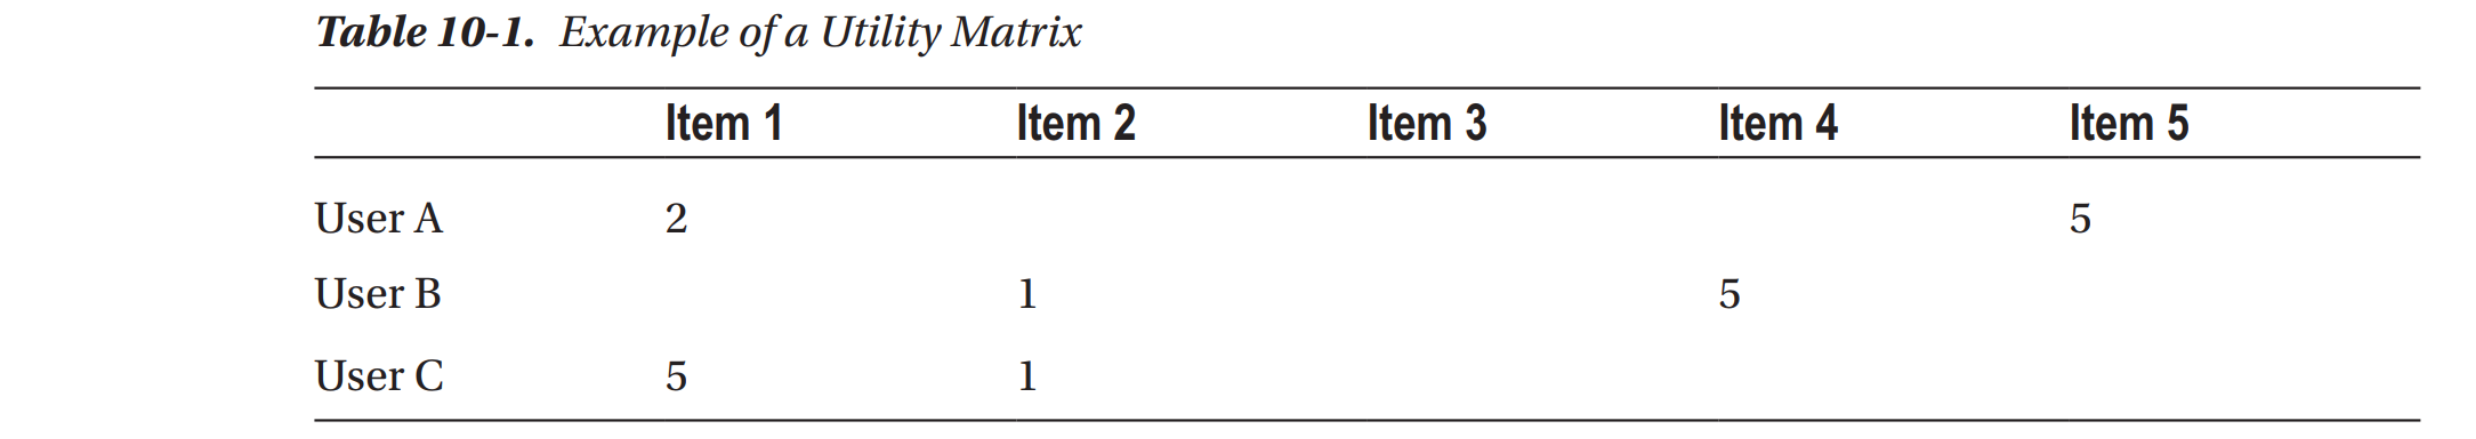

Notice that we have a lot of missing values in the matrix, these are the items that user hasn't bought. We can right away guess, say Item 4 is a recommendation for user C because user B and user C don't like Item 2, so it is likely they may end up liking the same items, in this case item 4

### <font color=blue>4. Matrix Factorization</font>
The process of matrix factorization means finding out a low rank approximation of the utility matrix. So we want to break down the utitlity matrix U into two low rank matrices so that we can recreate the matrix U by multiplying those two matrices. Mathematically,

                                        R = U * I.t
                                   and |R| = |U| * |I|
                                   
Here R is our original rating matrix, U is our user matrix, and I is our item matrix. Assuming the process helps us identify K latent features, our aim is to find two matrices X and Y such that their product (matrix multiplication) approximates R
+ X = |U| x K matrix (a matrix with dimensions of num_users * factors)
+ Y = |P| x K matrix (a matrix with dimensions of factors * num_movies)

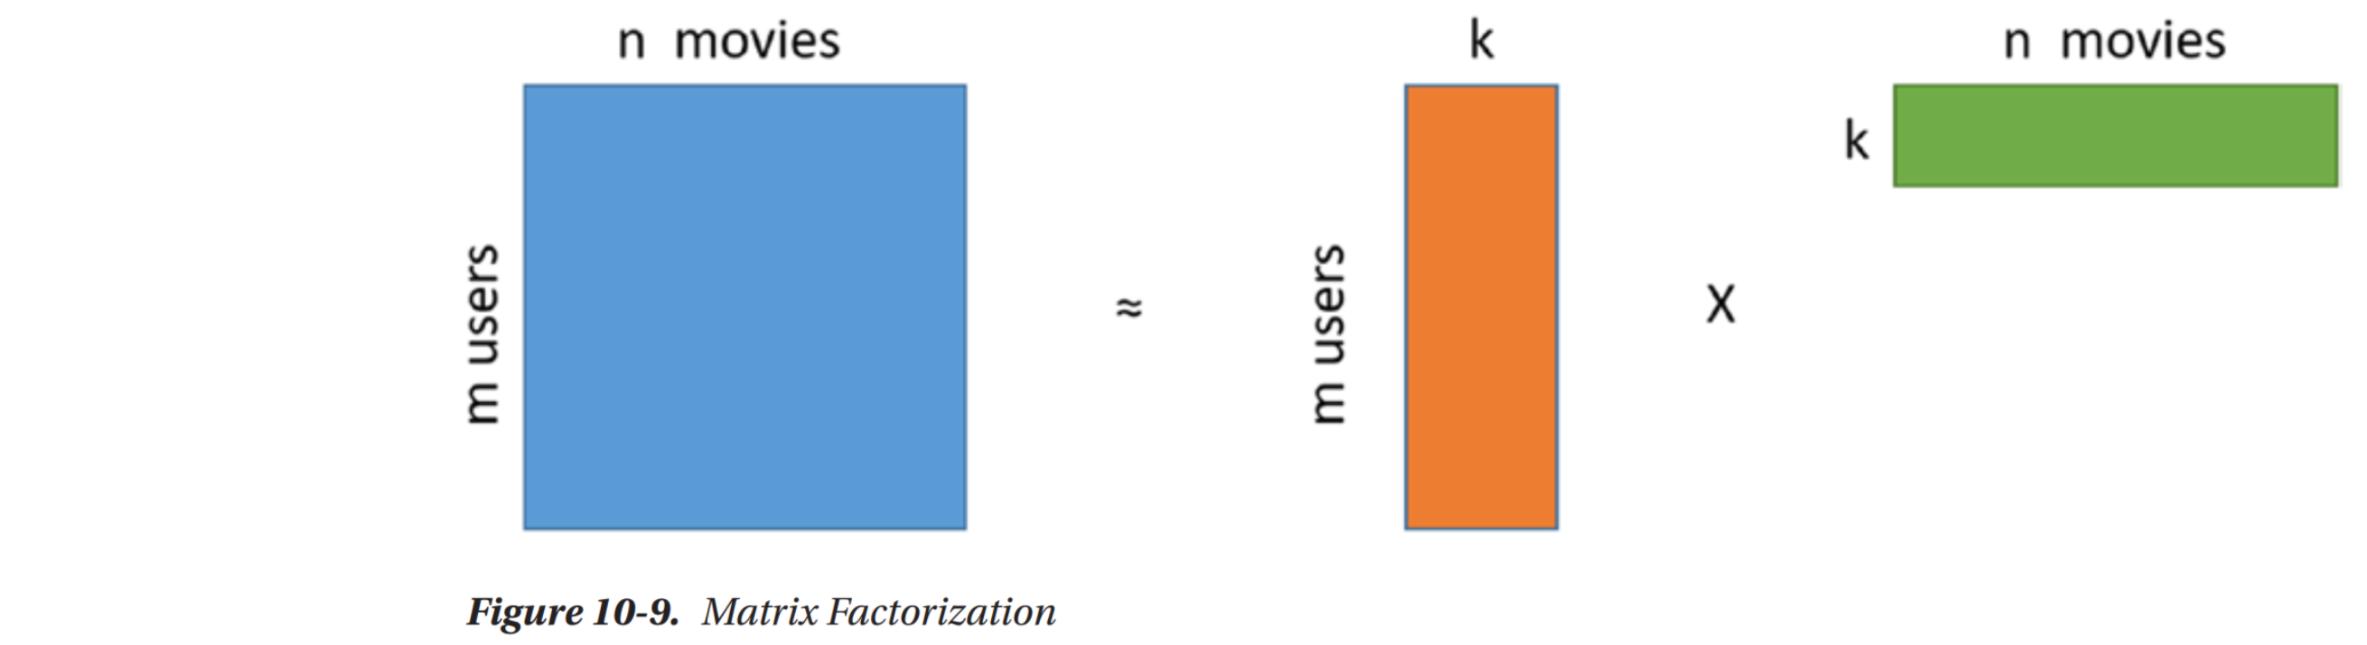

We can also try to explain the concept of matrix factorization as an image. Base on the above figure, we can generate the original matrix by multiplying the two matrices together. To make a recommendation to the user, we can multiply the corresponding user's row from the first matrix by the item matirx and determine the items from the row with maximum ratings. That will become our recommendations for the user. 
+ The first matrix represents the association between the users and the latent features
+ The second matrix take cares of the association between items and the latent features.

### <font color=blue>5. Sparsity</font> 
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

In [89]:
df_ratings = pd.read_csv('data/movie_rating/ratings.csv')

In [90]:
n_users = df_ratings['userId'].nunique()
n_items = df_ratings['movieId'].nunique()

sparsity=round(1.0-len(df_ratings)/float(n_users*n_items),3)
print('The sparsity level of dataset is ' + str(sparsity*100) + '%')

The sparsity level of dataset is 98.4%


## <font color=red>7.2. Matrix Factorization and Singular Value Decomposion (SVD)</font> 

A well-known matrix factorization method is **Singular value decomposition (SVD)**. Collaborating Filtering can be formulated by approximating a matrix `X` by usign singular value decomposition

Considering a matrix X having dimensions mxn such that m denotes total rows and n denotes total columns, the SVD of the matrix can be represented with the following equation

                                                    X=USV.t

Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space. Elements on the diagnoal in `S` are known as *singular values of `X`*. 

Now you can make a prediction by taking dot product of *`U`*, *`S`* and *`V^T`*.

### <font color=blue>1. Data Preparation

In [91]:
df_ratings = pd.read_csv('data/movie_rating/ratings_filtered.csv')
udx2uid, uid2udx, mdx2mid, mid2mdx = convert_id2dx('userId', 'movieId', df_ratings)

# apply index to dataframe
df_ratings['user_index'] = df_ratings['userId'].map(uid2udx)
df_ratings['movie_index'] = df_ratings['movieId'].map(mid2mdx)
df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
df_movies['movie_index'] = df_ratings['movieId'].map(mid2mdx)
#df_ratings['user_index'] = df_ratings.apply(lambda x:uid2udx[x['userId']], axis=1)
#df_ratings['movie_index'] = df_ratings.apply(lambda x:mid2mdx[x['movieId']], axis=1)
#df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
#df_movies['movie_index'] = df_movies.apply(lambda x:mid2mdx[x['movieId']], axis=1)


N = df_ratings.user_index.nunique()
M = df_ratings.movie_index.nunique()
N, M
df_ratings.head()

userId  movieId  rating  timestamp  user_index  movie_index
0       2       10   4.000  835355493           0            0
1       2       17   5.000  835355681           0            1
2       2       39   5.000  835355604           0            2
3       2       47   4.000  835355552           0            3
4       2       50   4.000  835355586           0            4

###  <font color=blue>2. Split data

The training matrix contains 80% of the ratings and the testing matrix contains 20% of the ratings. 
Since we have split the data into testing and training we will need to create two matrices (all users by all movies). 

In [92]:
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

train_data, test_data = train_test_split(df_ratings[['user_index', 'movie_index', 'rating']], test_size=0.2)

# Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((N, M))
for line in train_data.itertuples():
    train_data_matrix[line[1], line[2]] = line[3]
    
test_data_matrix = np.zeros((N, M))
for line in test_data.itertuples():
    test_data_matrix[line[1], line[2]] = line[3]
    
train_data_matrix.shape, test_data_matrix.shape

((427, 444), (427, 444))

### <font color=blue>3.  SVD - Using numpy library

In [93]:
U, S, Vt = np.linalg.svd(train_data_matrix)

print(U.shape, S.shape, Vt.shape)
S[0:10]

(427, 427) (427,) (444, 444)


array([358.77695411, 135.77959846, 122.64131268,  98.40114875,
        89.26472074,  80.60297656,  74.13505758,  69.80306803,
        65.39408384,  63.45147162])

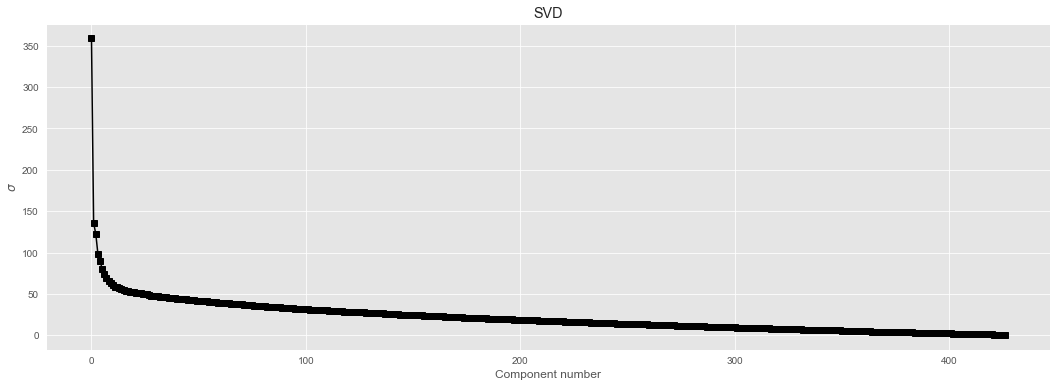

In [94]:
plt.figure(figsize=(18,6))
plt.plot(S, 'ks-')
plt.xlabel("Component number")
plt.ylabel('$\sigma$')
plt.title('SVD')
plt.show()

In [95]:

Vt[0:10,:].shape

(10, 444)

In [96]:
comps = np.arange(0,20)
pred_mt = U[:,comps]@np.diag(S[comps])@Vt[comps,:]

print(rmse(pred_mt, train_data_matrix))
print(rmse(pred_mt, test_data_matrix))

pred_mt

2.124878392919229
2.668829941033844


array([[ 1.95302368,  0.95910924,  1.78189828, ...,  1.12499869,
        -0.02051443,  1.07346336],
       [-0.08662104, -0.12796687,  0.29190794, ...,  0.10250782,
        -0.24382925,  0.19968831],
       [ 1.96397686, -0.11697689,  0.54680107, ...,  0.46838253,
         1.17209892,  0.31281283],
       ...,
       [ 1.36143611,  1.15921356,  2.42976325, ...,  1.35011055,
         1.01052356,  0.85629721],
       [ 1.32943297,  1.5510254 ,  1.02963805, ...,  0.65793686,
         0.0767613 ,  0.54176082],
       [ 0.29479082,  0.77318795,  0.62176014, ...,  0.15839953,
         0.66021987, -0.39584369]])

In [97]:
for n in [10, 20, 30, 50, 80, 100]:
    print('n: ', n)
    comps = np.arange(0, n)
    pred_mt = U[:,comps]@np.diag(S[comps])@Vt[comps,:]
    print('Train set')
    print(rmse(pred_mt, train_data_matrix))
    print('Test set')
    print(rmse(pred_mt, test_data_matrix)) 
    print()

n:  10
Train set
2.327516058262614
Test set
2.557824934055467

n:  20
Train set
2.124878392919229
Test set
2.668829941033844

n:  30
Train set
1.9608278941895498
Test set
2.810711610121605

n:  50
Train set
1.6791282213505336
Test set
3.0592500858996705

n:  80
Train set
1.3286263453682505
Test set
3.3320221854618577

n:  100
Train set
1.1372533640490652
Test set
3.4567384420934695



---
---

# <div class="alert alert-info"> 8. Hybrid Filter </div>

## <font color=red>8.1. Combine item features from content-based approach and collaborative approach </font> 

These types of recommendation engines will take into account both rating and content features to develop recommendations. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based models because they take the similarities of content as well as users. They are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction.

### <font color=blue>1. Data Preparation

In [53]:
df_ratings = pd.read_csv('data/movie_rating/ratings_filtered.csv')
udx2uid, uid2udx, mdx2mid, mid2mdx = convert_id2dx('userId', 'movieId', df_ratings)

# apply index to dataframe
df_ratings['user_index'] = df_ratings.apply(lambda x:uid2udx[x['userId']], axis=1)
df_ratings['movie_index'] = df_ratings.apply(lambda x:mid2mdx[x['movieId']], axis=1)

df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
df_movies['movie_index'] = df_movies.apply(lambda x:mid2mdx[x['movieId']], axis=1)

N = df_ratings.user_index.nunique()
M = df_ratings.movie_index.nunique()
N, M

(427, 444)

### <font color=blue>2. Content-based features

In [54]:
path = "data/movie_rating/"

content_embeddings = pd.read_pickle(os.path.join(f'{path}movie_tfidf_embeddings.pkl'))
content_embeddings = pd.DataFrame(content_embeddings)
print(content_embeddings.shape)
content_embeddings.head()

(9125, 25)


0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24
0 0.189 0.101 0.091 0.168 0.089 0.156 0.124 0.041 0.104 0.106 0.055 0.057 0.119 0.225 0.046 0.141 0.015 0.099 0.068 0.133 0.097 0.161 0.096 0.166 0.144
1 0.215 0.025 0.136 0.198 0.072 0.184 0.213 0.005 0.086 0.143 0.043 0.067 0.081 0.180 0.026 0.216 0.050 0.109 0.114 0.099 0.052 0.178 0.150 0.211 0.168
2 0.187 0.124 0.190 0.143 0.117 0.097 0.064 0.146 0.064 0.102 0.072 0.026 0.195 0.104 0.080 0.141 0.065 0.145 0.138 0.057 0.160 0.153 0.114 0.058 0.183
3 0.156 0.110 0.151 0.145 0.128 0.113 0.046 0.161 0.056 0.129 0.101 0.019 0.161 0.093 0.114 0.141 0.054 0.153 0.141 0.070 0.151 0.181 0.073 0.090 0.178
4 0.116 0.134 0.128 0.146 0.091 0.158 0.105 0.088 0.092 0.108 0.075 0.077 0.140 0.110 0.116 0.108 0.046 0.111 0.117 0.105 0.097 0.117 0.113 0.101 0.100

In [55]:
content_embeddings_cols = content_embeddings.columns
content_embeddings['movieId'] = df_movies['movieId']
content_embeddings = content_embeddings[content_embeddings.movieId.isin(mid2mdx.keys())]
content_embeddings['movie_index'] = content_embeddings.apply(lambda x:mid2mdx[x['movieId']], axis=1)
content_embeddings = content_embeddings.sort_values(['movie_index'])

print(content_embeddings.shape)
content_embeddings[content_embeddings.movieId == MovieID]

(444, 27)


0     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24  movieId  movie_index
5026 0.184 0.080 0.115 0.139 0.092 0.165 0.081 0.064 0.119 0.125 0.074 0.087 0.078 0.155 0.083 0.121 0.055 0.109 0.128 0.074 0.061 0.130 0.175 0.148 0.102 7153.000           72

### <font color=blue>3. Collaborative features

In [56]:
Vt[0:10,:].shape

NameError: name 'Vt' is not defined

In [ ]:
#cf_movie_embeddings  = pd.read_pickle('ml-latest-small/cf_movie_embeddings.pkl')
cf_movie_embeddings  = pd.DataFrame(Vt[0:10,:].T)
print(cf_movie_embeddings .shape)
cf_movie_embeddings .head()

In [220]:
MovieIndex

72

### <font color=blue>4.  Content Recommendations

In [221]:
def get_detailed_recs(movie_index, embeddings, df_movies):
    #get similar movies
    similarity_matrix = cosine_similarity(embeddings)
    item_sim_df = pd.DataFrame(similarity_matrix[movie_index])
    item_sim_df =  item_sim_df.reset_index(drop=False)
    item_sim_df.columns = ['movie_index', 'similarity_score']
    # assign movie_index
    item_sim_df['movie_index'] = sorted(mdx2mid.keys())
    # merge with table item_data to get the description info
    item_sim_df = item_sim_df.merge(df_movies, left_on='movie_index', right_on = 'movie_index', how='left')
    # sort similarity score in descending order
    item_sim_df = item_sim_df.sort_values('similarity_score', ascending=False)
    item_sim_df.reset_index(drop=True, inplace=True)  

    return item_sim_df

In [222]:
CT_sim_df = get_detailed_recs(MovieIndex, content_embeddings[content_embeddings_cols], df_movies)
CT_sim_df.head(10)

movie_index  similarity_score  movieId                                              title                           genres  movie_rating  movie_count                                                tag                                           document                                         text_clean
0           72             1.000     7153  Lord of the Rings: The Return of the King, The...   Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
1          249             0.992     5952      Lord of the Rings: The Two Towers, The (2002)                Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
2          246             0.991     4993  Lord of the Rings: The Fellowship of the Ring,...                Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
3          401             0.984     6539  Pirates of the Caribbean: The Curse of the Bla...  Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
4          346             0.983     2019        Seven Samurai (Shichinin no samurai) (1954)           Action Adventure Drama         4.278       54.000                                     {long classic}              Action Adventure Drama {long classic}                 action adventur drama long classic
5          406             0.982     8368    Harry Potter and the Prisoner of Azkaban (2004)           Adventure Fantasy IMAX         3.762       84.000                                                                               Adventure Fantasy IMAX                               adventur fantasi imax
6          119             0.980     1265                               Groundhog Day (1993)           Comedy Fantasy Romance         3.839      165.000  {alternate reality Bill Murray character devel...  Comedy Fantasy Romance {alternate reality Bill...  comedi fantasi romanc altern realiti bill murr...
7            8             0.977      150                                   Apollo 13 (1995)             Adventure Drama IMAX         3.902      200.000                             {Ron Howard tom hanks}        Adventure Drama IMAX {Ron Howard tom hanks}            adventur drama imax ron howard tom hank
8          335             0.976     1610                   Hunt for Red October, The (1990)        Action Adventure Thriller         3.897       97.000                                     {Katso Sanna!}           Action Adventure Thriller {Katso Sanna!}               action adventur thriller katso sanna
9           74             0.975     8636                                Spider-Man 2 (2004)      Action Adventure SciFi IMAX         3.625       84.000                       {the best comic adaptation!}  Action Adventure SciFi IMAX {the best comic ad...        action adventur scifi imax best comic adapt

### <font color=blue>5. Collaborative Recommendations

In [223]:
CF_sim_df = get_detailed_recs(MovieIndex, cf_movie_embeddings, df_movies)
CF_sim_df.head(10)

movie_index  similarity_score  movieId                                              title                                      genres  movie_rating  movie_count                                                tag                                           document                                         text_clean
0           72             1.000     7153  Lord of the Rings: The Return of the King, The...              Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long
1          246             0.945     4993  Lord of the Rings: The Fellowship of the Ring,...                           Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long
2          249             0.918     5952      Lord of the Rings: The Two Towers, The (2002)                           Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long
3          408             0.796     8961                            Incredibles, The (2004)  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}  Action Adventure Animation Children Comedy {su...        action adventur anim child comedi superhero
4          401             0.789     6539  Pirates of the Caribbean: The Curse of the Bla...             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...
5          407             0.764     8665                       Bourne Supremacy, The (2004)                       Action Crime Thriller         3.791       74.000                                                                                Action Crime Thriller                               action crime thriller
6          410             0.760    45722  Pirates of the Caribbean: Dead Man's Chest (2006)                    Action Adventure Fantasy         3.415       59.000                                                                             Action Adventure Fantasy                             action adventur fantasi
7           74             0.748     8636                                Spider-Man 2 (2004)                 Action Adventure SciFi IMAX         3.625       84.000                       {the best comic adaptation!}  Action Adventure SciFi IMAX {the best comic ad...        action adventur scifi imax best comic adapt
8           69             0.730     5349                                  Spider-Man (2002)             Action Adventure SciFi Thriller         3.522      134.000                                    {tobey maguire}    Action Adventure SciFi Thriller {tobey maguire}        action adventur scifi thriller tobey maguir
9           71             0.719     6377                                Finding Nemo (2003)         Adventure Animation Children Comedy         3.803      122.000                                                                  Adventure Animation Children Comedy                          adventur anim child comedi

### <font color=blue>6. Averaged Ensemble Recommendations

In [224]:
def get_ensemble_recs(MovieIndex, content_embeddings, collaborative_embeddings, df_movies):
    #get similar movies from content
    CT_sim_df = get_detailed_recs(MovieIndex, content_embeddings[content_embeddings_cols], df_movies)
    CT_sim_df.rename(columns={'similarity_score':'content_score'}, inplace=True)

    #get similar movies from collaborative
    CF_sim_df = get_detailed_recs(MovieIndex, cf_movie_embeddings, df_movies)
    CF_sim_df.rename(columns={'similarity_score':'collaborative_score'}, inplace=True)
    
    #ensemble results
    result_df = df_movies.copy()
    result_df = pd.merge(result_df, CT_sim_df[['movieId','content_score']], how='left', on='movieId')
    result_df = pd.merge(result_df, CF_sim_df[['movieId','collaborative_score']], how='left', on='movieId')
    result_df['average_score'] = (result_df['content_score'] + result_df['collaborative_score'])/2
    result_df.sort_values('average_score', ascending=False, inplace=True)

    return result_df

In [225]:
ens_rec = get_ensemble_recs(MovieIndex, content_embeddings[content_embeddings_cols], cf_movie_embeddings, df_movies)
ens_rec.head(10)

movieId                                              title                                      genres  movie_rating  movie_count                                                tag                                           document                                         text_clean  movie_index  content_score  collaborative_score  average_score
405     7153  Lord of the Rings: The Return of the King, The...              Action Adventure Drama Fantasy         4.128      176.000                                      {boring long}       Action Adventure Drama Fantasy {boring long}            action adventur drama fantasi bore long           72          1.000                1.000          1.000
374     4993  Lord of the Rings: The Fellowship of the Ring,...                           Adventure Fantasy         4.183      200.000                                             {long}                           Adventure Fantasy {long}                              adventur fantasi long          246          0.991                0.945          0.968
388     5952      Lord of the Rings: The Two Towers, The (2002)                           Adventure Fantasy         4.061      188.000                                      {boring long}                    Adventure Fantasy {boring long}                         adventur fantasi bore long          249          0.992                0.918          0.955
398     6539  Pirates of the Caribbean: The Curse of the Bla...             Action Adventure Comedy Fantasy         3.855      141.000  {Johnny Depp comedy Disney funny johnny depp m...  Action Adventure Comedy Fantasy {Johnny Depp c...  action adventur comedi fantasi johnni depp com...          401          0.984                0.789          0.886
415     8961                            Incredibles, The (2004)  Action Adventure Animation Children Comedy         3.861      126.000                                       {super-hero}  Action Adventure Animation Children Comedy {su...        action adventur anim child comedi superhero          408          0.948                0.796          0.872
423    45722  Pirates of the Caribbean: Dead Man's Chest (2006)                    Action Adventure Fantasy         3.415       59.000                                                                             Action Adventure Fantasy                             action adventur fantasi          410          0.968                0.760          0.864
410     8636                                Spider-Man 2 (2004)                 Action Adventure SciFi IMAX         3.625       84.000                       {the best comic adaptation!}  Action Adventure SciFi IMAX {the best comic ad...        action adventur scifi imax best comic adapt           74          0.975                0.748          0.861
409     8368    Harry Potter and the Prisoner of Azkaban (2004)                      Adventure Fantasy IMAX         3.762       84.000                                                                               Adventure Fantasy IMAX                               adventur fantasi imax          406          0.982                0.703          0.843
412     8665                       Bourne Supremacy, The (2004)                       Action Crime Thriller         3.791       74.000                                                                                Action Crime Thriller                               action crime thriller          407          0.911                0.764          0.838
419    33794                               Batman Begins (2005)                           Action Crime IMAX         3.857      105.000                              {bad camerawork slow}            Action Crime IMAX {bad camerawork slow}              action crime imax bad camerawork slow          258          0.952                0.709          0.831


##  <font color=red>8.2. Model-baed Hybrid Filer: Deep Learning</font>

A fully connected NN is used to find movie and user embeddings. In this architecture, a user embedding matrix of size (n_users, n_factors) and a movie embedding matrix of size (n_movies, n_factors) are randomly initalized and subsequently learned via gradient descent. The user and movie indices are used to lookup the embedding vectors (which are rows of the embedding matrices). These vectors are then concatenated and passed in as the input to the neural net

### <font color=blue>1. Data Preparation

In [57]:
df = pd.read_csv('data/movie_rating/ratings.csv')
udx2uid, uid2udx, mdx2mid, mid2mdx = convert_id2dx('userId', 'movieId', df)

# apply index to dataframe
df['user_index'] = df.apply(lambda x:uid2udx[x['userId']], axis=1)
df['movie_index'] = df.apply(lambda x:mid2mdx[x['movieId']], axis=1)

df_movies = pd.read_csv('data/movie_rating/movies.csv')
df_movies = df_movies[df_movies.movieId.isin(mid2mdx.keys())]
df_movies['movie_index'] = df_movies.apply(lambda x:mid2mdx[x['movieId']], axis=1)

N = df.user_index.nunique()
M = df.movie_index.nunique()
N, M

(671, 9066)

### <font color=blue>2. Split data into train set and test set

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn

train_data, test_data = train_test_split(df, test_size=0.2)

In [59]:
train_data.head()

userId  movieId  rating   timestamp  user_index  movie_index
37865     273     5816   4.500  1466946328         272          364
46342     339     2028   4.500  1446663181         338          113
64614     461     3895   0.500  1093224965         460         4626
41974     300     3578   4.500  1086010878         299          468
50236     369      292   3.000   847465462         368           48

### <font color=blue>3. Generate genres
Firstly, generate set of genre features from genres column, if a movie has one of these genres, then the corresponding feature has value of 1, otherwise 0. 

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

df_movies['genres'] = df_movies['genres'].str.replace(pat="|", repl=" ")
df_movies['genres'] = df_movies['genres'].str.replace(pat="-", repl="")
bow = CountVectorizer(ngram_range=(0,1), stop_words='english')
bow.fit(df_movies['genres'])

genre_df = bow.transform(df_movies['genres'])
genre_df = pd.DataFrame(genre_df.toarray())
genre_df.columns = bow.get_feature_names()
genre_df.head()

action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller  war  western
0       0          1          1         1       1      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
1       0          1          0         1       0      0            0      0        1         0       0       0     0       0        0        0        0      0         0    0        0
2       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        1      0         0    0        0
3       0          0          0         0       1      0            0      1        0         0       0       0     0       0        0        0        1      0         0    0        0
4       0          0          0         0       1      0            0      0        0         0       0       0     0       0        0        0        0      0         0    0        0

In [61]:
print(sorted(bow.vocabulary_.keys()))
print(bow.get_feature_names())
columns = bow.get_feature_names()
freq_genre = genre_df.sum(axis=0).sort_values(ascending=False)
freq_genre

['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']
['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmnoir', 'genres', 'horror', 'imax', 'listed', 'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war', 'western']


drama          4328
comedy         3307
thriller       1717
action         1543
romance        1541
adventure      1116
crime          1092
horror          872
scifi           791
fantasy         653
children        582
mystery         537
documentary     487
animation       447
musical         394
war             366
western         168
imax            153
filmnoir        121
listed           17
genres           17
dtype: int64

In [62]:
genre_df['movieId'] = df_movies['movieId']
movie_profile = pd.merge(df_movies[['movieId','title']], genre_df, how='left', on='movieId')
print(movie_profile.shape)
movie_profile.head()

(9066, 23)


movieId                               title  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller   war  western
0        1                    Toy Story (1995)   0.000      1.000      1.000     1.000   1.000  0.000        0.000  0.000    1.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000
1        2                      Jumanji (1995)   0.000      1.000      0.000     1.000   0.000  0.000        0.000  0.000    1.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000
2        3             Grumpier Old Men (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 0.000    0.000
3        4            Waiting to Exhale (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 0.000    0.000
4        5  Father of the Bride Part II (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000

In [63]:
movie_profile.head()

movieId                               title  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller   war  western
0        1                    Toy Story (1995)   0.000      1.000      1.000     1.000   1.000  0.000        0.000  0.000    1.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000
1        2                      Jumanji (1995)   0.000      1.000      0.000     1.000   0.000  0.000        0.000  0.000    1.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000
2        3             Grumpier Old Men (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 0.000    0.000
3        4            Waiting to Exhale (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 0.000    0.000
4        5  Father of the Bride Part II (1995)   0.000      0.000      0.000     0.000   1.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000

#### Join user rating and movie to get genre info

In [64]:
df_user_movie = pd.merge(train_data, movie_profile, how='left', on='movieId')
print(df_user_movie.shape)
df_user_movie.head()

(80003, 28)


userId  movieId  rating   timestamp  user_index  movie_index                                           title  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller   war  western
0     273     5816   4.500  1466946328         272          364  Harry Potter and the Chamber of Secrets (2002)   0.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 1.000    0.000
1     339     2028   4.500  1446663181         338          113                      Saving Private Ryan (1998)   1.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 1.000    0.000
2     461     3895   0.500  1093224965         460         4626                             Watcher, The (2000)   0.000      0.000      0.000     0.000   0.000  1.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     1.000 0.000    0.000
3     300     3578   4.500  1086010878         299          468                                Gladiator (2000)   1.000      1.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000
4     369      292   3.000   847465462         368           48                                 Outbreak (1995)   1.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  1.000     1.000 0.000    0.000

#### calculate frequency and average of rating for each movie

In [68]:
selected_genres = columns
cnt_user_profile = df_user_movie.groupby(['userId'])[selected_genres].sum()
cnt_user_profile.columns = selected_genres
cnt_ratio_user_profile = cnt_user_profile.copy()
cnt_user_profile['sum'] = cnt_user_profile[selected_genres].sum(axis=1)
for col in selected_genres:
    cnt_ratio_user_profile[col] = cnt_user_profile[col]/cnt_user_profile['sum']
    
cnt_ratio_user_profile.columns = ['ratio_' + col for col in cnt_ratio_user_profile.columns]       
ratio_columns = cnt_ratio_user_profile.columns
cnt_ratio_user_profile.head()

ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  ratio_war  ratio_western
userId                                                                                                                                                                                                                                                                                                                    
1              0.100            0.180            0.060           0.040         0.100        0.040              0.000        0.140          0.060           0.000         0.000         0.020       0.000         0.000          0.020          0.000          0.000        0.100           0.100      0.020          0.020
2              0.106            0.056            0.022           0.039         0.144        0.050              0.000        0.194          0.050           0.000         0.000         0.022       0.011         0.000          0.017          0.017          0.111        0.028           0.094      0.028          0.011
3              0.127            0.069            0.020           0.029         0.127        0.098              0.000        0.206          0.039           0.000         0.000         0.020       0.010         0.000          0.010          0.000          0.078        0.029           0.088      0.029          0.020
4              0.109            0.109            0.039           0.066         0.142        0.064              0.004        0.101          0.066           0.002         0.000         0.029       0.000         0.000          0.039          0.021          0.049        0.074           0.076      0.008          0.002
5              0.039            0.059            0.049           0.049         0.216        0.069              0.000        0.196          0.034           0.000         0.000         0.010       0.015         0.000          0.034          0.025          0.132        0.010           0.049      0.015          0.000

In [69]:
user_movie_ratings = df_user_movie.copy()
for col in selected_genres:
    user_movie_ratings[col] = user_movie_ratings[col] * user_movie_ratings['rating']

rating_user_profile = user_movie_ratings.groupby(['userId'])[selected_genres].sum()
rating_columns = rating_user_profile.columns
rating_user_profile['total_rating'] = rating_user_profile[rating_columns].sum(axis=1)

avg_rating_user_profile = rating_user_profile[selected_genres]/cnt_user_profile[selected_genres]
avg_rating_user_profile = avg_rating_user_profile.fillna(0)
avg_rating_user_profile.columns = ['avg_rating_' + col for col in selected_genres]
rating_columns = avg_rating_user_profile.columns
avg_rating_user_profile.head()

avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western
userId                                                                                                                                                                                                                                                                                                                                                                                                                             
1                   2.800                 2.167                 2.000                2.500              2.000             2.500                   0.000             2.571               1.667                0.000              0.000              2.500            0.000              0.000               3.000               0.000               0.000             2.400                2.700           2.000               3.000
2                   3.316                 3.800                 3.750                3.571              3.077             3.667                   0.000             3.714               3.444                0.000              0.000              3.500            4.000              0.000               4.000               4.000               3.600             3.800                3.471           3.800               5.000
3                   3.577                 3.571                 3.000                2.500              3.808             3.650                   0.000             3.857               3.125                0.000              0.000              3.000            2.000              0.000               2.000               0.000               3.625             3.500                3.500           3.333               3.500
4                   4.283                 4.321                 4.684                4.625              4.319             4.161                   4.000             4.429               4.531                5.000              0.000              3.857            0.000              0.000               4.789               4.100               4.458             4.194                4.027           4.750               3.000
5                   3.875                 3.792                 3.850                3.900              4.000             3.643                   0.000             3.800               3.786                0.000              0.000              3.500            4.000              0.000               4.143               3.300               3.981             4.000                3.700           3.500               0.000

In [70]:
ratio_columns

Index(['ratio_action', 'ratio_adventure', 'ratio_animation', 'ratio_children', 'ratio_comedy', 'ratio_crime', 'ratio_documentary', 'ratio_drama', 'ratio_fantasy', 'ratio_filmnoir', 'ratio_genres', 'ratio_horror', 'ratio_imax', 'ratio_listed', 'ratio_musical', 'ratio_mystery', 'ratio_romance', 'ratio_scifi', 'ratio_thriller', 'ratio_war', 'ratio_western'], dtype='object')

In [71]:
rating_columns

Index(['avg_rating_action', 'avg_rating_adventure', 'avg_rating_animation', 'avg_rating_children', 'avg_rating_comedy', 'avg_rating_crime', 'avg_rating_documentary', 'avg_rating_drama', 'avg_rating_fantasy', 'avg_rating_filmnoir', 'avg_rating_genres', 'avg_rating_horror', 'avg_rating_imax', 'avg_rating_listed', 'avg_rating_musical', 'avg_rating_mystery', 'avg_rating_romance', 'avg_rating_scifi', 'avg_rating_thriller', 'avg_rating_war', 'avg_rating_western'], dtype='object')

In [72]:
user_profile = pd.concat([cnt_ratio_user_profile[ratio_columns],avg_rating_user_profile[rating_columns]],axis=1)
user_profile = user_profile.reset_index()
print(user_profile.shape)
user_profile.head()

(671, 43)


userId  ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  \
0       1         0.100            0.180            0.060           0.040         0.100        0.040              0.000        0.140          0.060           0.000         0.000         0.020       0.000         0.000          0.020          0.000          0.000        0.100           0.100      0.020          0.020              2.800                 2.167                 2.000                2.500              2.000             2.500                   0.000             2.571   
1       2         0.106            0.056            0.022           0.039         0.144        0.050              0.000        0.194          0.050           0.000         0.000         0.022       0.011         0.000          0.017          0.017          0.111        0.028           0.094      0.028          0.011              3.316                 3.800                 3.750                3.571              3.077             3.667                   0.000             3.714   
2       3         0.127            0.069            0.020           0.029         0.127        0.098              0.000        0.206          0.039           0.000         0.000         0.020       0.010         0.000          0.010          0.000          0.078        0.029           0.088      0.029          0.020              3.577                 3.571                 3.000                2.500              3.808             3.650                   0.000             3.857   
3       4         0.109            0.109            0.039           0.066         0.142        0.064              0.004        0.101          0.066           0.002         0.000         0.029       0.000         0.000          0.039          0.021          0.049        0.074           0.076      0.008          0.002              4.283                 4.321                 4.684                4.625              4.319             4.161                   4.000             4.429   
4       5         0.039            0.059            0.049           0.049         0.216        0.069              0.000        0.196          0.034           0.000         0.000         0.010       0.015         0.000          0.034          0.025          0.132        0.010           0.049      0.015          0.000              3.875                 3.792                 3.850                3.900              4.000             3.643                   0.000             3.800   

   avg_rating_fantasy  avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  
0               1.667                0.000              0.000              2.500            0.000              0.000               3.000               0.000               0.000             2.400                2.700           2.000               3.000  
1               3.444                0.000              0.000              3.500            4.000              0.000               4.000               4.000               3.600             3.800                3.471           3.800               5.000  
2               3.125                0.000              0.000              3.000            2.000              0.000               2.000               0.000               3.625             3.500                3.500           3.333               3.500  
3               4.531                5.000              0.000              3.857  

In [102]:
train_df = train_data[['userId','movieId','rating']]
train_df = train_df.merge(movie_profile.drop(['title'], axis=1), how='left', on='movieId')
train_df = train_df.merge(user_profile, how='left', on='userId')
train_df['Index'] = train_df.index
#train_df = train_df.drop(['userId','movieId','rating','Index','movie_count','movie_rating'],axis=1)
print(train_df.shape)
train_df.head()

(80003, 67)


userId  movieId  rating  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller   war  western  ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  \
0     273     5816   4.500   0.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    1.000  0.000     0.000 1.000    0.000         0.099            0.099            0.037           0.047         0.162        0.031              0.016        0.168          0.042           0.000         0.005         0.021       0.010         0.005          0.037          0.016          0.073        0.047           0.073   
1     339     2028   4.500   1.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 1.000    0.000         0.153            0.074            0.005           0.000         0.127        0.085              0.026        0.175          0.016           0.000         0.005         0.032       0.005         0.005          0.005          0.011          0.058        0.037           0.127   
2     461     3895   0.500   0.000      0.000      0.000     0.000   0.000  1.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     1.000 0.000    0.000         0.094            0.065            0.018           0.028         0.165        0.061              0.002        0.172          0.035           0.005         0.000         0.038       0.001         0.000          0.018          0.024          0.092        0.051           0.106   
3     300     3578   4.500   1.000      1.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000         0.198            0.149            0.010           0.010         0.089        0.040              0.000        0.119          0.030           0.000         0.000         0.040       0.010         0.000          0.010          0.030          0.040        0.089           0.109   
4     369      292   3.000   1.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  1.000     1.000 0.000    0.000         0.134            0.106            0.014           0.028         0.120        0.077              0.000        0.134          0.035           0.000         0.000         0.007       0.014         0.000          0.014          0.021          0.070        0.049           0.141   

   ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  Index  
0      0.010          0.000              4.368                 4.237                 4.143                4.222              4.323             4.250                   4.167             4.203               4.562                0.000              3.000              4.375            3.750              3.000               4.357               4.500               4.429             4.556                4.321           4.250               0.000      0  
1      0.042          0.011              3.966                 3.964                 4.000                0.000              4.021  

In [103]:
test_df = test_data[['userId','movieId','rating']]
test_df = test_df[test_df['userId'].isin(train_df['userId'])]
test_df = test_df.merge(movie_profile.drop(['title'], axis=1), how='left', on='movieId')
test_df = test_df.merge(user_profile, how='left', on='userId')
test_df['Index'] = test_df.index
print(test_df.shape)
test_df.head()

(20001, 67)


userId  movieId  rating  action  adventure  animation  children  comedy  crime  documentary  drama  fantasy  filmnoir  genres  horror  imax  listed  musical  mystery  romance  scifi  thriller   war  western  ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  \
0     128     1028   5.000   0.000      0.000      0.000     1.000   1.000  0.000        0.000  0.000    1.000     0.000   0.000   0.000 0.000   0.000    1.000    0.000    0.000  0.000     0.000 0.000    0.000         0.092            0.072            0.043           0.057         0.119        0.051              0.001        0.150          0.043           0.001         0.000         0.029       0.003         0.000          0.040          0.030          0.117        0.029           0.105   
1     665     4736   1.000   0.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000         0.068            0.072            0.044           0.075         0.194        0.036              0.000        0.158          0.048           0.000         0.000         0.019       0.002         0.000          0.034          0.014          0.115        0.034           0.064   
2     120     4002   3.000   0.000      0.000      0.000     0.000   1.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 0.000    0.000         0.118            0.057            0.007           0.018         0.157        0.046              0.004        0.161          0.025           0.000         0.000         0.032       0.004         0.000          0.007          0.050          0.075        0.079           0.143   
3     257     1274   4.000   1.000      1.000      1.000     0.000   0.000  0.000        0.000  0.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  1.000     0.000 0.000    0.000         0.126            0.070            0.020           0.010         0.121        0.085              0.010        0.226          0.030           0.015         0.000         0.020       0.000         0.000          0.000          0.020          0.055        0.045           0.095   
4     468     6440   4.000   0.000      0.000      0.000     0.000   0.000  0.000        0.000  1.000    0.000     0.000   0.000   0.000 0.000   0.000    0.000    0.000    0.000  0.000     0.000 1.000    0.000         0.073            0.070            0.019           0.030         0.169        0.056              0.012        0.209          0.035           0.011         0.000         0.025       0.004         0.000          0.019          0.026          0.085        0.046           0.077   

   ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  Index  
0      0.014          0.004              3.896                 3.981                 4.097                4.073              3.814             3.919                   1.000             3.899               3.677                2.000              0.000              2.857            3.000              0.000               4.276               3.727               4.024             3.810                3.789           3.500               3.667      0  
1      0.012          0.010              3.359                 3.403                 3.707                3.486              3.209  

In [104]:
# all_columns = columns + list(ratio_columns) + list(rating_columns)
all_columns = list(ratio_columns) + list(rating_columns)

In [105]:
# scale training set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df[all_columns]))
#scaled_train_df.index = scaled_train_df.index
scaled_train_df.columns = all_columns

scaled_test_df = pd.DataFrame(scaler.transform(test_df[all_columns]))
#scaled_test_df.index = scaled_test_df.index
scaled_test_df.columns = all_columns

scaled_test_df.head(3)

ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  \
0         0.345            0.327            0.295           0.339         0.275        0.230              0.010        0.287          0.326           0.013         0.000         0.079       0.055         0.000          0.419          0.134          0.364        0.112           0.424      0.119          0.052              0.755                 0.796                 0.819                0.815              0.708             0.784                   0.200             0.725               0.735   
1         0.246            0.326            0.303           0.449         0.472        0.163              0.000        0.306          0.367           0.000         0.000         0.052       0.043         0.000          0.358          0.061          0.358        0.132           0.259      0.102          0.122              0.635                 0.681                 0.741                0.697              0.559             0.688                   0.000             0.603               0.702   
2         0.448            0.260            0.049           0.107         0.375        0.209              0.026        0.313          0.191           0.000         0.000         0.087       0.071         0.000          0.075          0.221          0.233        0.304           0.578      0.124          0.045              0.673                 0.644                 0.550                0.620              0.659             0.708                   0.600             0.608               0.686   

   avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  
0                0.400              0.000              0.571            0.600              0.000               0.855               0.745               0.805             0.762                0.758           0.700               0.733  
1                0.000              0.000              0.544            1.000              0.000               0.775               0.677               0.661             0.669                0.643           0.745               0.644  
2                0.000              0.000              0.711            0.600              0.000               0.650               0.657               0.671             0.700                0.705           0.700               0.500

In [106]:
X_train = scaled_train_df.reset_index(drop=True)
y_train = train_df['rating'].reset_index(drop=True)

X_test = scaled_test_df.reset_index(drop=True)
y_test = test_df['rating'].reset_index(drop=True)

y_train

0       4.500
1       4.500
2       0.500
3       4.500
4       3.000
         ... 
79998   5.000
79999   3.000
80000   3.500
80001   4.000
80002   3.000
Name: rating, Length: 80003, dtype: float64

In [108]:
print(X_train.shape)
X_train.head()

(80003, 42)


ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  \
0         0.373            0.453            0.253           0.283         0.388        0.141              0.114        0.329          0.319           0.000         0.199         0.057       0.209         0.199          0.384          0.069          0.228        0.182           0.297      0.091          0.000              0.860                 0.847                 0.829                0.844              0.833             0.850                   0.833             0.801               0.913   
1         0.594            0.337            0.037           0.000         0.297        0.381              0.192        0.346          0.121           0.000         0.201         0.086       0.106         0.201          0.055          0.047          0.181        0.143           0.514      0.366          0.134              0.770                 0.793                 0.800                0.000              0.759             0.856                   0.720             0.735               0.833   
2         0.349            0.295            0.124           0.168         0.395        0.275              0.016        0.340          0.269           0.048         0.000         0.104       0.029         0.000          0.188          0.108          0.286        0.198           0.431      0.131          0.109              0.485                 0.523                 0.616                0.600              0.503             0.639                   0.600             0.487               0.543   
3         0.776            0.677            0.068           0.059         0.198        0.178              0.000        0.211          0.226           0.000         0.000         0.108       0.198         0.000          0.104          0.131          0.123        0.345           0.441      0.171          0.125              0.811                 0.807                 0.400                0.400              0.631             0.725                   0.000             0.802               0.700   
4         0.514            0.481            0.097           0.169         0.278        0.349              0.000        0.247          0.268           0.000         0.000         0.019       0.282         0.000          0.147          0.093          0.219        0.191           0.570      0.183          0.178              0.626                 0.667                 0.800                0.700              0.638             0.673                   0.000             0.776               0.680   

   avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  
0                0.000              0.600              0.875            0.750              0.600               0.871               0.900               0.886             0.911                0.864           0.850               0.000  
1                0.000              0.800              0.733            0.900              0.800               0.700               0.800               0.809             0.771                0.792           0.875               0.850  
2                0.571              0.000              0.519            0.600              0.000               0.604               0.574               0.581             0.549                0.529           0.586               0.550  
3                0.000              0.000              0.675            0.900             

In [109]:
print(X_test.shape)
X_test.head()

(20001, 42)


ratio_action  ratio_adventure  ratio_animation  ratio_children  ratio_comedy  ratio_crime  ratio_documentary  ratio_drama  ratio_fantasy  ratio_filmnoir  ratio_genres  ratio_horror  ratio_imax  ratio_listed  ratio_musical  ratio_mystery  ratio_romance  ratio_scifi  ratio_thriller  ratio_war  ratio_western  avg_rating_action  avg_rating_adventure  avg_rating_animation  avg_rating_children  avg_rating_comedy  avg_rating_crime  avg_rating_documentary  avg_rating_drama  avg_rating_fantasy  \
0         0.345            0.327            0.295           0.339         0.275        0.230              0.010        0.287          0.326           0.013         0.000         0.079       0.055         0.000          0.419          0.134          0.364        0.112           0.424      0.119          0.052              0.755                 0.796                 0.819                0.815              0.708             0.784                   0.200             0.725               0.735   
1         0.246            0.326            0.303           0.449         0.472        0.163              0.000        0.306          0.367           0.000         0.000         0.052       0.043         0.000          0.358          0.061          0.358        0.132           0.259      0.102          0.122              0.635                 0.681                 0.741                0.697              0.559             0.688                   0.000             0.603               0.702   
2         0.448            0.260            0.049           0.107         0.375        0.209              0.026        0.313          0.191           0.000         0.000         0.087       0.071         0.000          0.075          0.221          0.233        0.304           0.578      0.124          0.045              0.673                 0.644                 0.550                0.620              0.659             0.708                   0.600             0.608               0.686   
3         0.480            0.320            0.139           0.060         0.280        0.384              0.073        0.471          0.230           0.145         0.000         0.055       0.000         0.000          0.000          0.089          0.172        0.175           0.386      0.304          0.191              0.724                 0.793                 0.875                0.750              0.672             0.741                   0.850             0.686               0.800   
4         0.265            0.318            0.134           0.181         0.406        0.254              0.091        0.430          0.270           0.105         0.000         0.067       0.081         0.000          0.203          0.114          0.265        0.178           0.313      0.192          0.123              0.491                 0.566                 0.629                0.589              0.479             0.590                   0.635             0.512               0.602   

   avg_rating_filmnoir  avg_rating_genres  avg_rating_horror  avg_rating_imax  avg_rating_listed  avg_rating_musical  avg_rating_mystery  avg_rating_romance  avg_rating_scifi  avg_rating_thriller  avg_rating_war  avg_rating_western  
0                0.400              0.000              0.571            0.600              0.000               0.855               0.745               0.805             0.762                0.758           0.700               0.733  
1                0.000              0.000              0.544            1.000              0.000               0.775               0.677               0.661             0.669                0.643           0.745               0.644  
2                0.000              0.000              0.711            0.600              0.000               0.650               0.657               0.671             0.700                0.705           0.700               0.500  
3                0.700              0.000              0.825            0.000             

### Define DNN architecture

In [110]:
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

def performance_evaluation(X_train, X_test, y_train, y_test, model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print('Train mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred_train))))
    print()
    print('Test mse: {}'.format(mean_squared_error(y_test, pred_test)))
    print('Test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred_test))))

In [111]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import backend as K

In [128]:
def dnn_model(input_dim, dim1,n_epochs, batch_size):   
    keras.backend.clear_session()
    tf.keras.backend.clear_session
    tf.random.set_seed(9)
    np.random.seed(9)
    
    dnn = Sequential()
    dnn.add(Dense(dim1, input_dim=input_dim, activation='relu'))
    dnn.add(Dense(50, activation='relu'))
    dnn.add(Dense(30, activation='relu'))
    dnn.add(Dense(1, activation='relu'))
    
    print(dnn.summary())
    
    #dnn.compile(loss='mse', optimizer='adam', metrics=['mae'])
    dnn.compile(loss='mse', optimizer='adam')
    t_ini = datetime.datetime.now()
    history = dnn.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,  verbose=1, validation_split=0.2)
    t_fin = datetime.datetime.now()
    print('Time to run the model: {} Sec.'.format((t_fin - t_ini).total_seconds()))
    plot_history(history)
    performance_evaluation(X_train, X_test, y_train.values, y_test.values, dnn)

    return dnn

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4300      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 10,911
Trainable params: 10,911
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
6401/6401 [==============================] - 12s 2ms/step - loss: 0.9742 - val_loss: 0.9413
Epoch 2/50
6401/6401 [==============================] - 11s 2ms/step - loss: 0.9308 - val_loss: 0.9589
Epoch 3/50
6401/6401 [=================

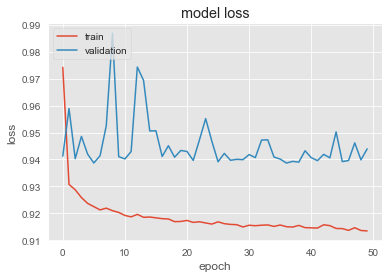

Train mse: 0.9190681944118453
Train rmse: 0.9586804443670713

Test mse: 0.9305499340526561
Test rmse: 0.9646501614848028


In [131]:
dnn = dnn_model(len(X_train.columns), 100, n_epochs=50, batch_size=10)

In [132]:
y_pred = dnn.predict(X_test)
y_pred.ravel()

array([3.84138  , 3.3237839, 3.5393448, ..., 3.332176 , 2.9494529,
       3.662938 ], dtype=float32)

In [133]:
y_pred = dnn.predict(X_test).ravel()
np.round(y_pred[11:20],2)

array([3.37, 2.96, 2.69, 2.96, 3.67, 3.3 , 3.2 , 3.81, 3.46],
      dtype=float32)

In [134]:
np.round(y_test.values[11:20],2)

array([2. , 3. , 4.5, 3. , 4.5, 4. , 2.5, 4.5, 2.5])